## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import sqlalchemy
from sqlalchemy import create_engine, MetaData, Table, inspect
from scipy.stats import boxcox

## Data Extraction

To perform the data extraction from the CSVs, I decided to upload them to Google Sheets in order to publish them on the internet and obtain a URL address.

This way, I can extract them by using the URLs of each dataset as the data source in the first parameter of the pd.read_csv function.

### Customers Table Data Extraction ("olist_customers_dataset")

In [2]:
sheet_id = '1vRvbAyAJ2gdyBw9gZVeuAET5q6VK9RPTYSJI6eHqHwbgfYh2uN_0G6wOCea5Kd6P4Ypy8n5Vt7QnsSw' # Google Sheet identifier
gid = '963376232' # identifier (gid)
url = f'https://docs.google.com/spreadsheets/d/e/2PACX-{sheet_id}/pub?gid={gid}&single=true&output=csv'

In [3]:
customers = pd.read_csv(url)
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Geolocation Table Data Extraction ("olist_geolocation_dataset")

In [4]:
sheet_id = '1vSDvevIVg4kDzCAcQ5HyMVIyCvqGyPyRC3ZGMkYN_bfuU5SkmphWlHioJnqZLt7OpnoRvdqgB7N0WQu' # Identificador do ficheiro Google Sheet
gid = '1977351983' # Identificador da aba (gid)
url = f'https://docs.google.com/spreadsheets/d/e/2PACX-{sheet_id}/pub?gid={gid}&single=true&output=csv'

In [5]:
geolocation = pd.read_csv(url)
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-2.354.562.128.115.260,-4.663.929.204.800.160,sao paulo,SP
1,1046,-23.546.081.127.035.500,-4.664.482.029.837.150,sao paulo,SP
2,1046,-2.354.612.896.641.460,-4.664.295.148.361.130,sao paulo,SP
3,1041,-235.443.921.648.681,-4.663.949.930.627.840,sao paulo,SP
4,1035,-23.541.577.961.711.400,-4.664.160.722.329.610,sao paulo,SP


### Sellers Table Data Extraction ("olist_sellers_dataset")


In [6]:
sheet_id = '1vROxFKzG0EjCaJAdBtfbfhIMQO4kxJz56ZRu1U97PI7c0ONITTVPv6hD5NWN1jwRTN9BsngE0Fp-nKg' # Identificador do ficheiro Google Sheet
gid = '1213137177' # Identificador da aba (gid)
url = f'https://docs.google.com/spreadsheets/d/e/2PACX-{sheet_id}/pub?gid={gid}&single=true&output=csv'

In [7]:
sellers = pd.read_csv(url)
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Products Table Data Extraction ("olist_products_dataset")

In [8]:
sheet_id = '1vRMQJ1Oygww5JDu9qdUr_ST_FQZaS_6D7T9-ZsuJp7CKDcRoRrXPTdG9bBFW8JJBh9mygCy4ldrNPQu' # Identificador do ficheiro Google Sheet
gid = '107409373' # Identificador da aba (gid)
url = f'https://docs.google.com/spreadsheets/d/e/2PACX-{sheet_id}/pub?gid={gid}&single=true&output=csv'

In [9]:
products = pd.read_csv(url)
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Payments Table Data Extraction ("olist_order_payments_dataset")

In [10]:
sheet_id = '1vQkpNimA2qepbd3xjJW5xP-mnk9omrEWVWK5zG9--S8KokqDgA8dLexGO-HwntwyARN7Ayp5w2Mer8f' # Identificador do ficheiro Google Sheet
gid = '767622239' # Identificador da aba (gid)
url = f'https://docs.google.com/spreadsheets/d/e/2PACX-{sheet_id}/pub?gid={gid}&single=true&output=csv'

In [11]:
payments = pd.read_csv(url)
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Reviews Table Data Extraction ("olist_order_reviews_dataset")

In [12]:
sheet_id = '1vRNwIAyul7UQqfjxo3VBZqEV3IyHfFlXS-jbS2oolMg0srDm9OYTF13zfubjWWdaocs1Oj-3_5uuZOW' # Identificador do ficheiro Google Sheet
gid = '2056092939' # Identificador da aba (gid)
url = f'https://docs.google.com/spreadsheets/d/e/2PACX-{sheet_id}/pub?gid={gid}&single=true&output=csv'

In [13]:
reviews = pd.read_csv(url)
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Orders Table Data Extraction ("olist_orders_dataset")

In [14]:
sheet_id = '1vSVYBecKaec3SHQZl-ZEUoQYAvsFHqlJHMpXxV_oE_ijxGQiat6azEXpHrdL_QKioo-kZaYE7dQwBlC' # Identificador do ficheiro Google Sheet
gid = '156107923' # Identificador da aba (gid)
url = f'https://docs.google.com/spreadsheets/d/e/2PACX-{sheet_id}/pub?gid={gid}&single=true&output=csv'

In [15]:
orders = pd.read_csv(url)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Order Items Table Data Extraction ("olist_orders_items_dataset")

Example:
The order_id = 00143d0f86d6fbd9f9b38ab440ac16f5 has 3 items (same product). Each item has the freight calculated accordingly to its measures and weight. To get the total freight value for each order you just have to sum.

The total order_item value is: 21.33 * 3 = 63.99

The total freight value is: 15.10 * 3 = 45.30

The total order value (product + freight) is: 45.30 + 63.99 = 109.29

In [16]:
sheet_id = '1vTRNHDGFnyaeiYW_mUajRYO0Q0z9XQwOzTO-FJbPU51w24MksyP0idgWEDh4zh9YPXToMmTcA3_RWgp' # Identificador do ficheiro Google Sheet
gid = '990593036' # Identificador da aba (gid)
url = f'https://docs.google.com/spreadsheets/d/e/2PACX-{sheet_id}/pub?gid={gid}&single=true&output=csv'

In [17]:
order_items = pd.read_csv(url)
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Data Source Relationship Schema


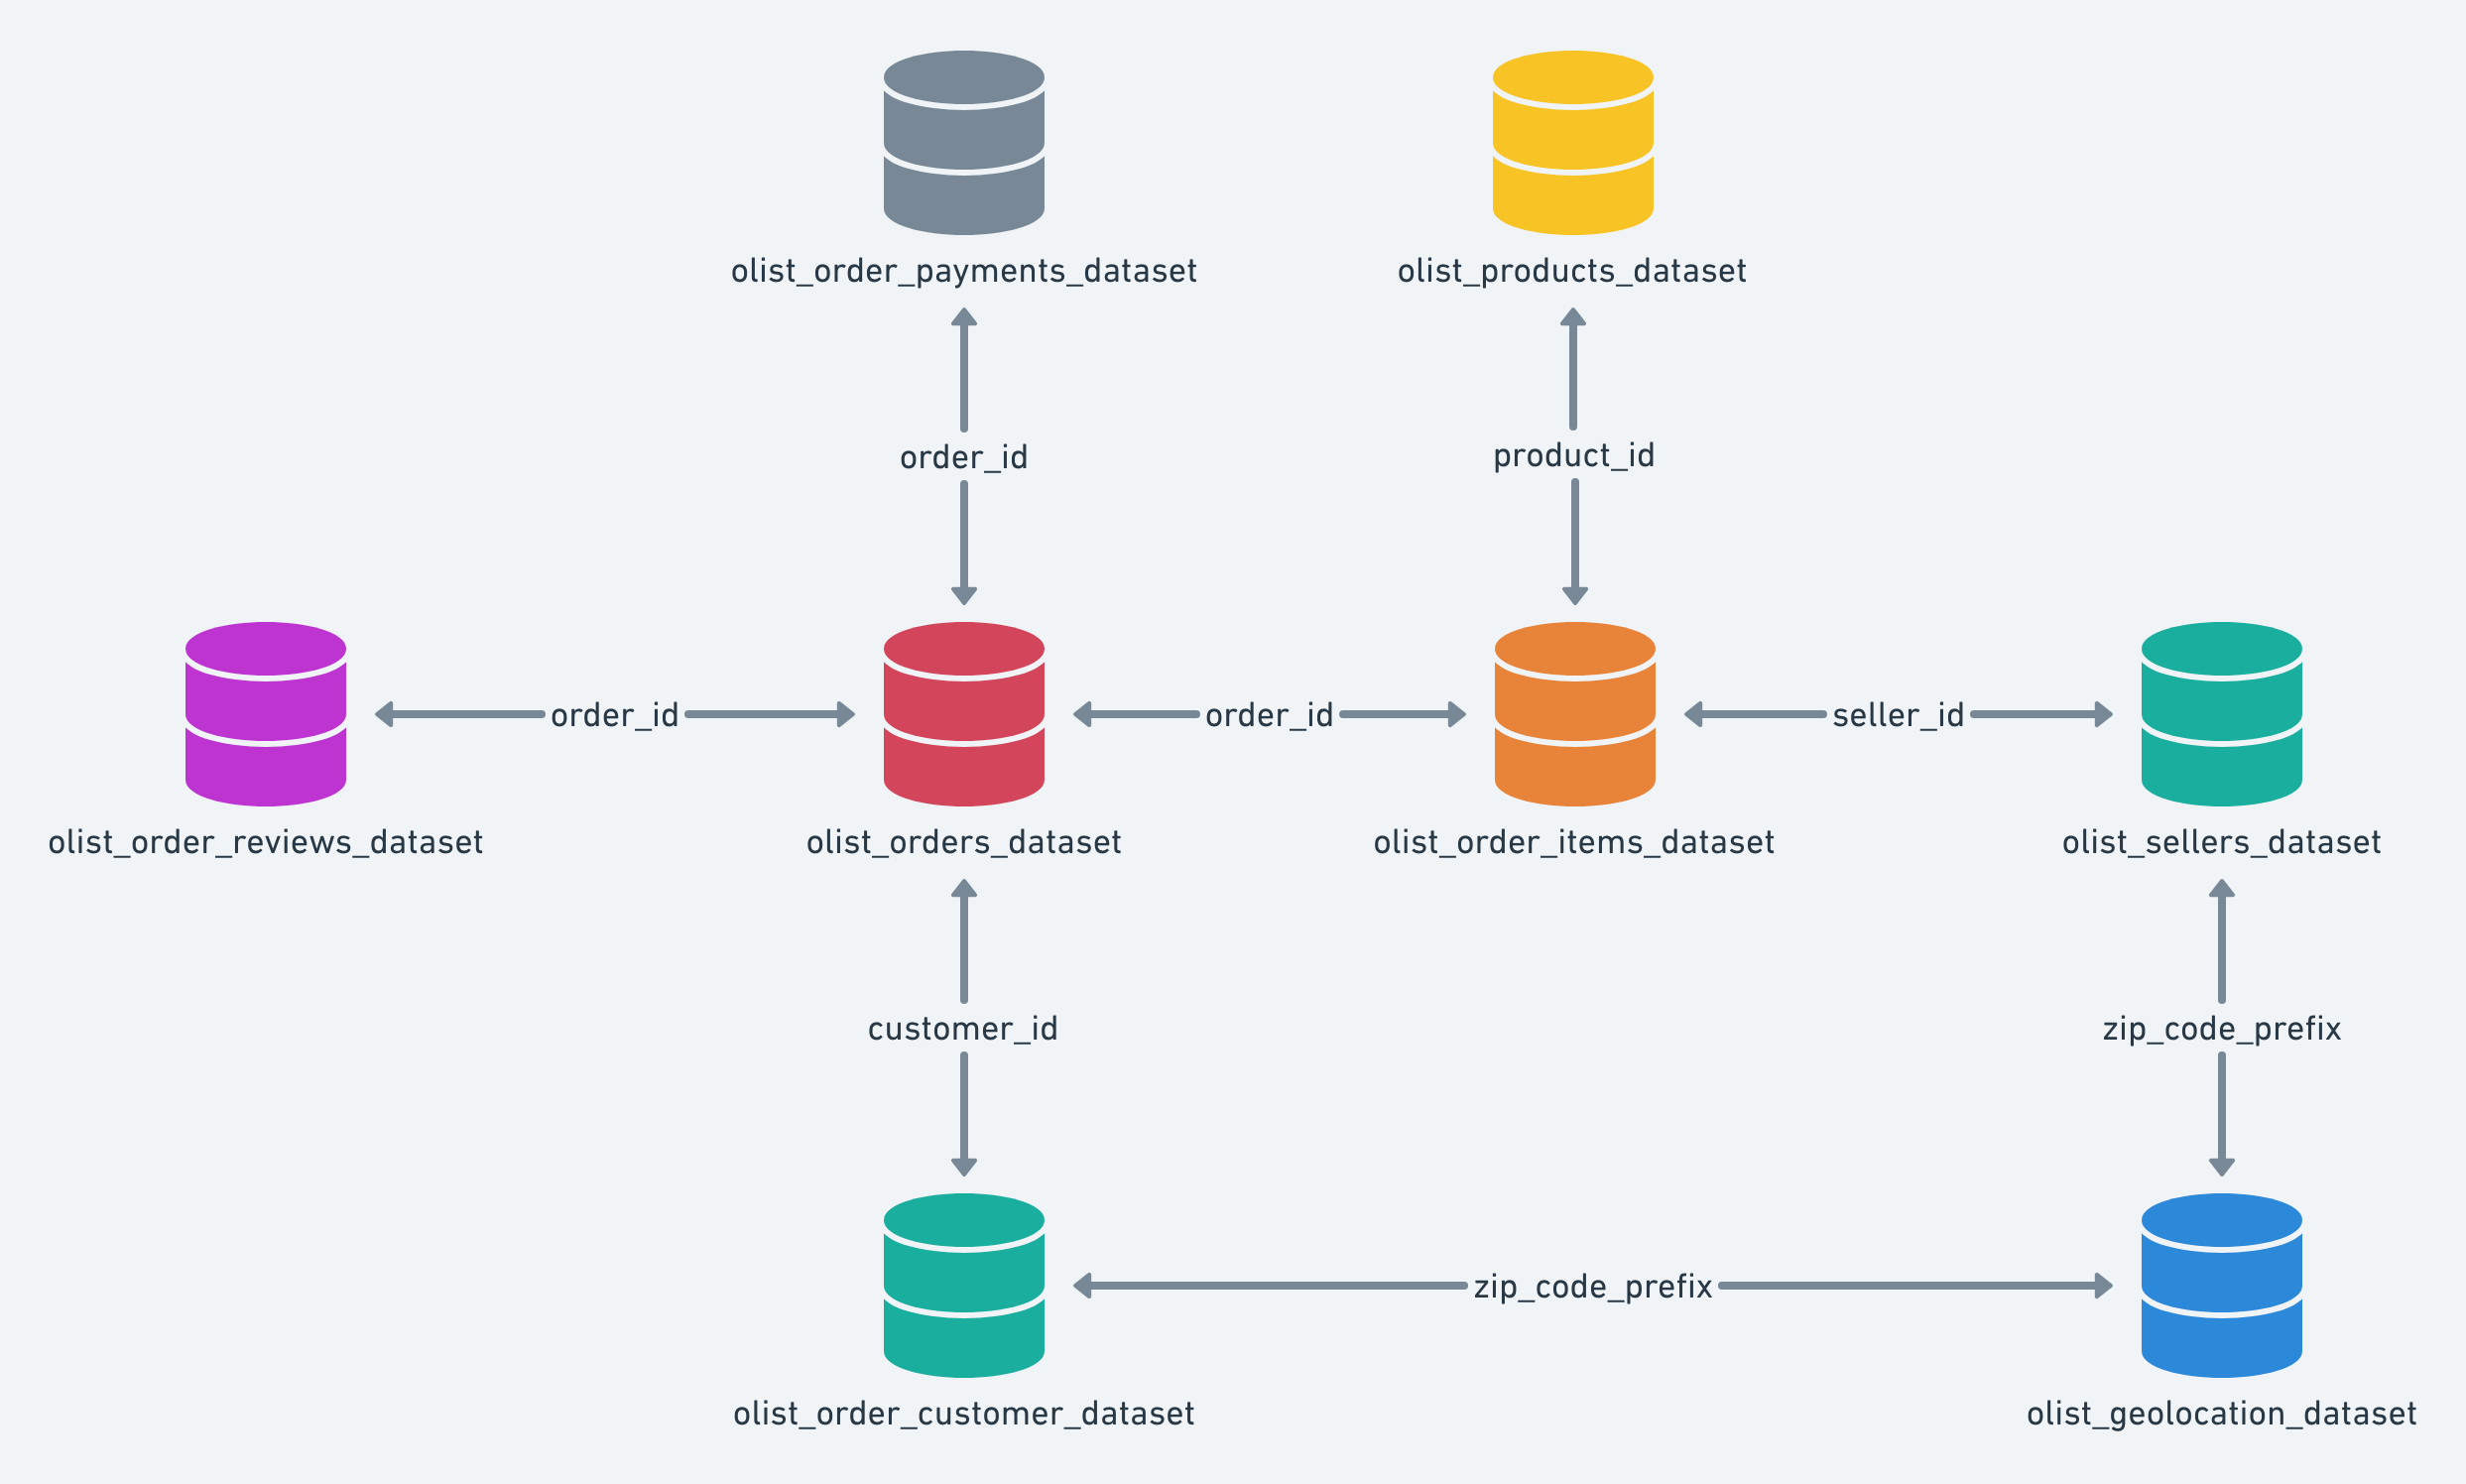

## Initial EDA

### Customers Dataset

#### General Inspection

In [ ]:
# Check the first 5 records of the dataset
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# Check dataset information
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
# Check Duplicates for ID
print(len(customers) == customers["customer_id"].nunique())

True


In [ ]:
# Check Missing Data
print(customers.isna().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


#### Categorical Features Inspection

In [ ]:
# Checking unique values
print("Unique number of cities: {}".format(customers["customer_city"].nunique()))
print("Unique number of states: {}".format(customers["customer_state"].nunique()))
print("Unique number of zip codes: {}".format(customers["customer_zip_code_prefix"].nunique()))

Unique number of cities: 4119
Unique number of states: 27
Unique number of zip codes: 14994


In [ ]:
# There are too many unique cities and states
# Therefore, defining Top 10 to resume

# Creation of top 10 dataframes
top10_city_i = customers["customer_city"].value_counts().\
    sort_values(ascending = False).head(10).index

top10_state_i = customers["customer_state"].value_counts().\
    sort_values(ascending = False).head(10).index

top10_city_df = customers[customers["customer_city"].isin(top10_city_i)]

top10_state_df = customers[customers["customer_state"].isin(top10_state_i)]

<ipython-input-24-7de2007833a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


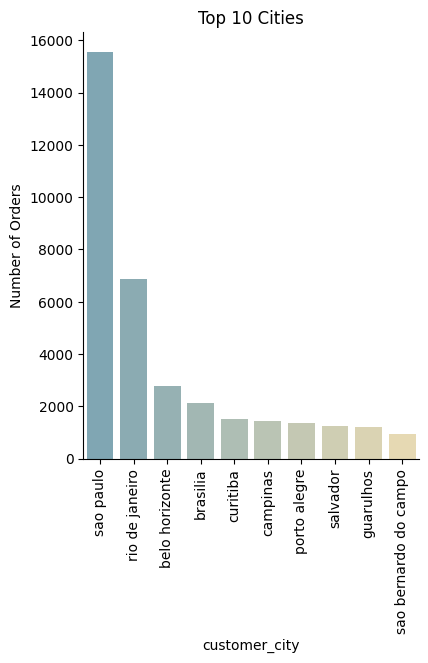

In [ ]:
# Visualization of Top 10 cities and states
# Note: The "count" is done per customer_id (all rows) which are different orders

sns.catplot(
    data = top10_city_df,
    x = "customer_city",
    kind = "count",
    palette = "blend:#7AB,#EDA",
    order = top10_city_i)
plt.title("Top 10 Cities")
plt.xticks(rotation=90)
plt.ylabel("Number of Orders")
plt.show()

<ipython-input-147-0b82d28e836e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


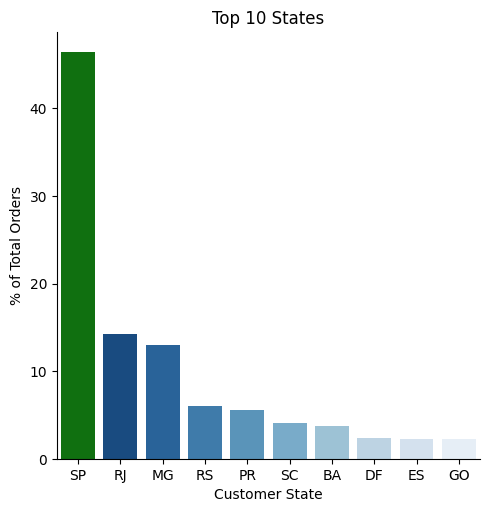

In [ ]:
state_freq = (top10_state_df["customer_state"].value_counts(normalize = True) * 100).reset_index(name = "count")

# Create a custom palette
first_color = "green"
blues_palette = sns.color_palette("Blues_r", n_colors = len(state_freq) - 1)
custom_palette = [first_color] + blues_palette

sns.catplot(
    data = state_freq,
    x = "customer_state",
    y = "count",
    kind = "bar",
    palette = custom_palette,
    order = top10_state_i)
plt.title("Top 10 States")
plt.ylabel("% of Total Orders")
plt.xlabel("Customer State")
plt.show()

<ipython-input-26-442fece5e99e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


<Figure size 1000x600 with 0 Axes>

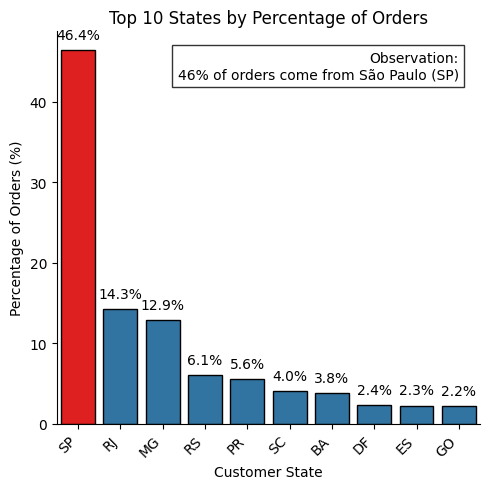

In [ ]:
#Select customers from the top 10 states by total orders
top10_state_df = customers[customers["customer_state"].isin(top10_state_i)]
total_orders = len(top10_state_df)

# Group by customer_state and calculate the count and percentage
state_counts = top10_state_df['customer_state'].value_counts().reset_index()
state_counts.columns = ['customer_state', 'order_count']
state_counts['percentage'] = (state_counts['order_count'] / total_orders * 100).round(2)

# Ensure the order matches top10_state_i
state_counts = state_counts.set_index('customer_state').reindex(top10_state_i).reset_index()

# Create a custom color palette: red for "SP", blue for all others
colors = ['red' if state == 'SP' else '#1F77B4' for state in top10_state_i]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot using sns.catplot with kind="bar"
g = sns.catplot(
    data=state_counts,
    x='customer_state',
    y='percentage',
    kind='bar',
    palette=colors,
    order=top10_state_i,
    edgecolor='black'
)

# Access the underlying Matplotlib axis
ax = g.ax

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 1,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Add the observation as an annotation
ax.text(
    0.95, 0.95,
    'Observation:\n46% of orders come from São Paulo (SP)',
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
)

# Add title and labels
plt.title("Top 10 States by Percentage of Orders")
plt.ylabel("Percentage of Orders (%)")
plt.xlabel("Customer State")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Number of Clients and Orders per Top 10 State
top10_state_df.groupby("customer_state").agg(
    n_orders = ("customer_id", "nunique"),
    n_clients = ("customer_unique_id", "nunique")).\
    sort_values(by = "n_orders", ascending = False)

,n_orders,n_clients
customer_state,,
SP,41746,40302
RJ,12852,12384
MG,11635,11259
RS,5466,5277
PR,5045,4882
SC,3637,3534
BA,3380,3277
DF,2140,2075
ES,2033,1964


#### Numerical Features Inspection ##



No numercial features

#### Notes



- No customer_id duplicates.
- No missing data.
- The Top 10 Cities represent 35.24% in the total dataset (in 4119 cities).
- The Top 10 States represent 90.46% in total dataset (in 27 states).

### Products Dataset

#### General Inspection

In [ ]:
# Check the first 5 records of the dataset
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# Check dataset information
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
# Check Duplicates
print(len(products) == products["product_id"].nunique())

True


In [ ]:
# Check Missing Data
print(products.isna().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [ ]:
# Check if the missing values are from the same rows
print((products["product_category_name"].isna() &\
    products["product_name_lenght"].isna() &\
        products["product_description_lenght"].isna() &\
            products["product_photos_qty"].isna()).sum())
# As the sum is 610, we can confirm the missing values are in the same rows

610


#### Categorical Features Inspection

In [ ]:
# Check categories
print("Number of unique categories: {}".format(
    products["product_category_name"].nunique()))

Number of unique categories: 73


In [ ]:
[*set(products["product_category_name"])]
# After checking all unique categories, there are some similarities between the
# names.

['artigos_de_festas',
 'fashion_roupa_infanto_juvenil',
 'consoles_games',
 'livros_tecnicos',
 'telefonia',
 'automotivo',
 'fashion_roupa_masculina',
 'papelaria',
 'livros_importados',
 'fashion_esporte',
 'eletronicos',
 'seguros_e_servicos',
 'construcao_ferramentas_iluminacao',
 'ferramentas_jardim',
 'alimentos_bebidas',
 'cine_foto',
 'flores',
 'agro_industria_e_comercio',
 'instrumentos_musicais',
 'la_cuisine',
 'market_place',
 'casa_conforto',
 'cool_stuff',
 'relogios_presentes',
 'construcao_ferramentas_seguranca',
 'fashion_underwear_e_moda_praia',
 'industria_comercio_e_negocios',
 'pc_gamer',
 'tablets_impressao_imagem',
 nan,
 'moveis_decoracao',
 'fashion_calcados',
 'moveis_quarto',
 'musica',
 'beleza_saude',
 'informatica_acessorios',
 'eletroportateis',
 'portateis_casa_forno_e_cafe',
 'malas_acessorios',
 'moveis_sala',
 'sinalizacao_e_seguranca',
 'artes_e_artesanato',
 'portateis_cozinha_e_preparadores_de_alimentos',
 'telefonia_fixa',
 'casa_conforto_2',
 'm

In [ ]:
# Creation of Top 10 categories dataframes
top10_cat_i = products["product_category_name"].value_counts().\
    sort_values(ascending = False).head(10).index

top10_cat_df = products[products["product_category_name"].isin(top10_cat_i)]

In [ ]:
# Frequency of Top 10 categories in %
top10_cat_freq = top10_cat_df["product_category_name"].value_counts() / len(products) * 100
print(top10_cat_freq)

product_category_name
cama_mesa_banho           9.192437
esporte_lazer             8.700798
moveis_decoracao          8.063488
beleza_saude              7.417074
utilidades_domesticas     7.086280
automotivo                5.766138
informatica_acessorios    4.974052
brinquedos                4.282116
relogios_presentes        4.033262
telefonia                 3.441474
Name: count, dtype: float64


In [ ]:
# Representation of total (%) of Top 10 categories in all dataset
sum_top10_cat = round(np.sum(top10_cat_freq), 2)
print("Top 10 Categories in total dataset: {}%".format(sum_top10_cat))

Top 10 Categories in total dataset: 62.96%


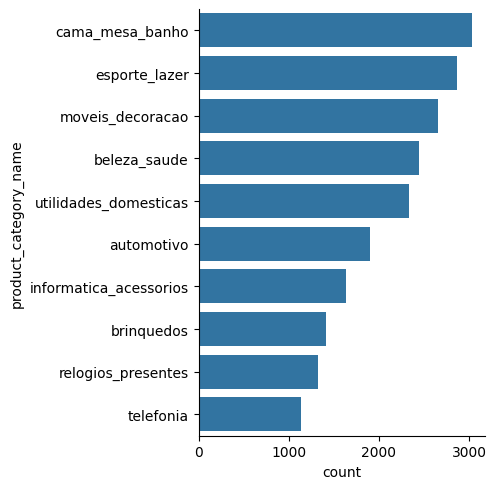

In [ ]:
# Visualization of Top 10
sns.catplot(
    data = top10_cat_df,
    y = "product_category_name",
    kind = "count",
    order = top10_cat_i)
plt.show()

In [ ]:
# As there is missing data, we will consider the rule of thumb as 5%
# to consider the drop (or other options)
prod_threshold = len(products) * 0.05

In [ ]:
prod_cols_to_drop = products.columns[
    products.isna().sum().isin(range(1, int(prod_threshold) + 1))]
# All columns are below the threshold.

#### Numerical Features Inspection

In [ ]:
# Describe dimensions of products
products.iloc[:, 5:9].describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


In [ ]:
# Create a new feature of product volume
products["product_volume_cm3"] = products["product_length_cm"] *\
    products["product_height_cm"] * products["product_width_cm"]

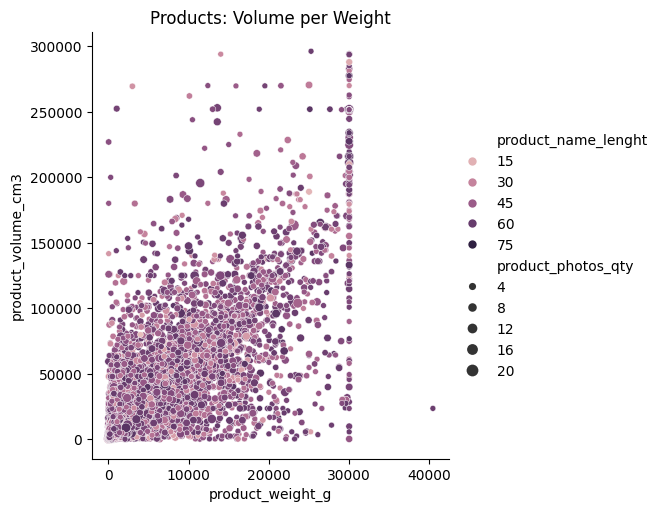

In [ ]:
# Visualization
sns.relplot(
    data = products,
    x = "product_weight_g",
    y = "product_volume_cm3",
    hue = "product_name_lenght",
    size = "product_photos_qty",
    kind = "scatter")
plt.title("Products: Volume per Weight")
plt.show()

In [ ]:
# Describe name and description lenghts, and quantity of photos
products.iloc[:, 2:5].describe()

,product_name_lenght,product_description_lenght,product_photos_qty
count,32341.000000,32341.000000,32341.000000
mean,48.476949,771.495285,2.188986
std,10.245741,635.115225,1.736766
min,5.000000,4.000000,1.000000
25%,42.000000,339.000000,1.000000
50%,51.000000,595.000000,1.000000
75%,57.000000,972.000000,3.000000
max,76.000000,3992.000000,20.000000


#### Notes

- No product_id duplicates.
- There is missing data in some columns and they represent less than 5%
of total data in products (rule of thumb). Still, most likely it makes
sense to keep the data as these products are still relevant for other
analysis regarding orders.
- There are 73 unique categories. However, some similarities between the
names.
- The Top 10 Categories represent 62.96% in total dataset.
- It looks like there is a limit of 30Kg in weight and 1 outlier.



### Orders Datase

#### General Inspection

In [ ]:
# Check the first 5 records of the dataset
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# Check dataset information
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


In [ ]:
# Dates are not in the correct type
orders.iloc[:, 3:8].head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# Changing these features to date type
for col in orders.columns[3:8]:
    orders[col] = pd.to_datetime(orders[col])

In [ ]:
# Check Duplicates
print(len(orders) == orders["order_id"].nunique())

True


In [ ]:
# Check Missing Data
print(orders.isna().sum())
# There are dates with missing values

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [ ]:
# Quick check on missing data by order status (quick view only in 1 feature)

missing_ord_del_cust_date = orders[orders["order_delivered_customer_date"].isna()]
print(missing_ord_del_cust_date["order_status"].value_counts())

# For example, considering the feature "order_delivered_customer_date",
# only 8 orders were delivered and, in this case, we could consider
# "missing data". However, it would be expected no delivered date for the
# remaining status, as we can see there.

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64


#### Categorical Features Inspection

In [ ]:
# Check order status
print("Number of unique status: {}".format(
    orders["order_status"].nunique()))

Number of unique status: 8


In [ ]:
# Frequency of order sttatus in %
print(orders["order_status"].value_counts(normalize = True) * 100)

order_status
delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: proportion, dtype: float64


<ipython-input-54-7bbb7fed8d0b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


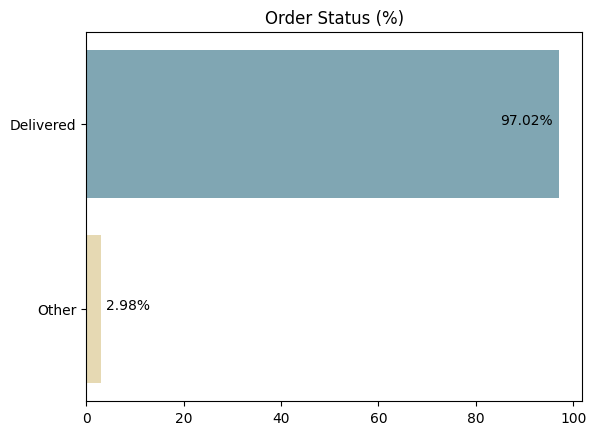

In [ ]:
# Visualization of order status
# Frequency of order sttatus in %
ord_dict = {"delivered": "Delivered"}
ord_stat_dic = orders["order_status"].map(ord_dict).fillna("Other")
ord_stat = ord_stat_dic.value_counts(normalize = True) * 100


sns.barplot(
    y = ord_stat.index,
    x = ord_stat.values,
    palette = "blend:#7AB,#EDA"
)
plt.title("Order Status (%)")
plt.ylabel(None)
plt.annotate("97.02%", xy = (85, ord_stat.index[0]))
plt.annotate("2.98%", xy = (4, ord_stat.index[1]))
plt.show()


In [ ]:
# Visualization
# Extract weekday from order_purchase_timestamp
orders["wd_ord_purchase_timestamp"] = orders["order_purchase_timestamp"].dt.weekday

weekday = {0: "Monday", 1: "Tuesday", 2: "Wednesday",
           3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday" }

orders["wd_ord_purchase_timestamp"] = orders["wd_ord_purchase_timestamp"].map(weekday)

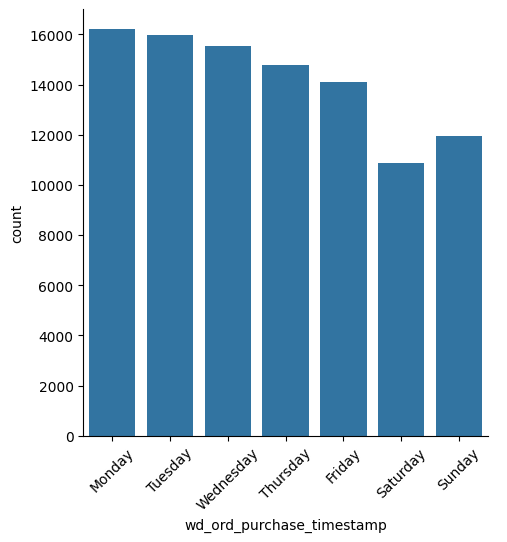

In [ ]:
# Countplot
sns.catplot(
    data = orders,
    x = "wd_ord_purchase_timestamp",
    kind = "count",
    order = weekday.values())
plt.xticks(rotation = 45)
plt.show()

#### Numerical Features Inspection

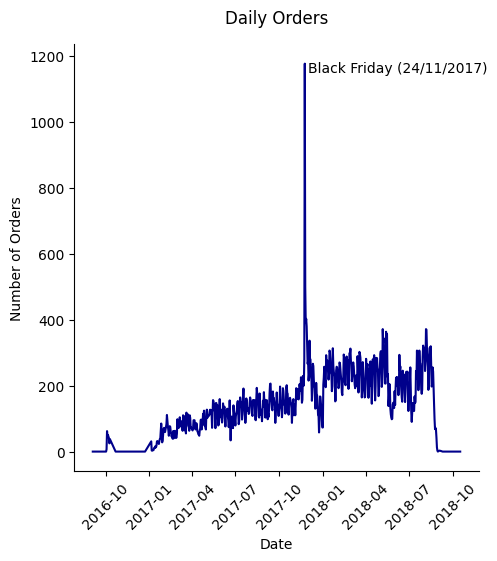

In [ ]:
# Visualization of number of orders on a daily basis
orders["order_purchase_date"] = orders["order_purchase_timestamp"].dt.date
daily_orders = orders.groupby("order_purchase_date").agg(
    n_orders = ("order_id", "nunique"))

sns.relplot(
    data = daily_orders,
    x = "order_purchase_date",
    y = "n_orders",
    color = "darkblue",
    kind = "line")
plt.annotate("Black Friday (24/11/2017)", xy=(pd.Timestamp('2017-11-30'), 1150))
plt.xticks(rotation = 45)
plt.ylabel("Number of Orders")
plt.xlabel("Date")
plt.title("Daily Orders", pad = 15)
plt.show()

In [ ]:
# There is a huge peak on the graph. Checking the day of this max
daily_orders[daily_orders["n_orders"] == daily_orders["n_orders"].max()]

,n_orders
order_purchase_date,
2017-11-24,1176


In [ ]:
# Checking this day and time
orders_peak = orders[(orders["order_purchase_timestamp"] >= "2017-11-24 00:00:00") &\
    (orders["order_purchase_timestamp"] < "2017-11-25 00:00:00")].\
    groupby("order_purchase_timestamp").agg(
        n_orders = ("order_id", "nunique"))

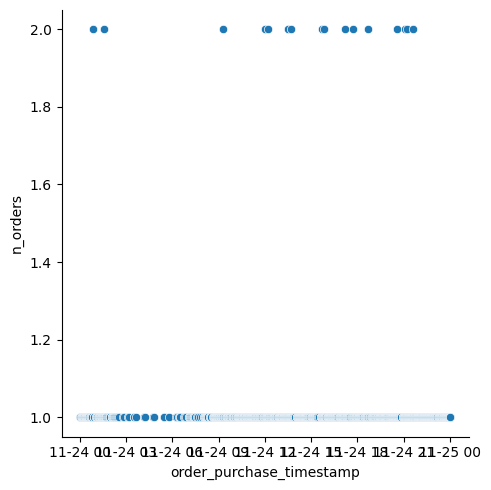

In [ ]:
sns.relplot(
    data = orders_peak,
    x = "order_purchase_timestamp",
    y = "n_orders",
    kind = "scatter")
plt.show()
# It looks like there is no peak during the day that could be interpreted as
# an error.

In [ ]:
# Analyse the time difference between the purchase and deliver dates
# Converting it to nº of days (a day has 86400 seconds)
orders["days_dif_purchase_deliver"] = (orders["order_delivered_customer_date"]\
    - orders["order_purchase_timestamp"]).dt.total_seconds() / 86400

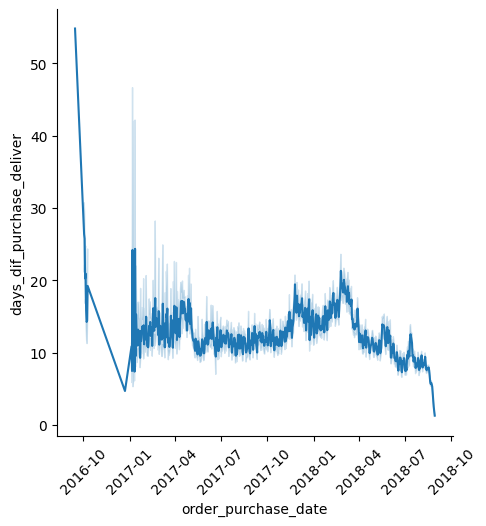

In [ ]:
# Visualization
sns.relplot(
    data = orders,
    x = "order_purchase_date",
    y = "days_dif_purchase_deliver",
    kind = "line")
plt.xticks(rotation = 45)
plt.show()

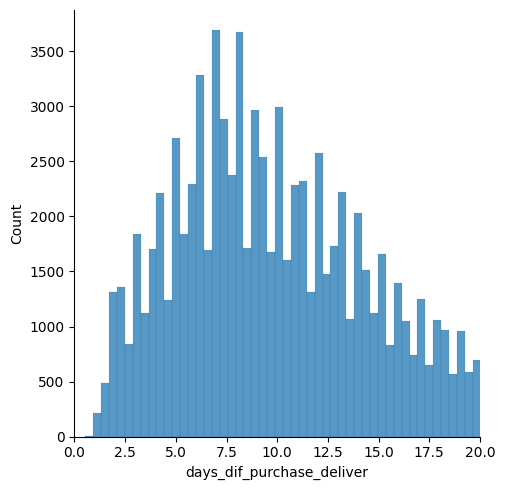

In [ ]:
sns.displot(
    data = orders,
    x = "days_dif_purchase_deliver",
    kind = "hist",)
plt.xlim(0, 20)    # included to remove the outliers (>75%) to analyse better
plt.show()

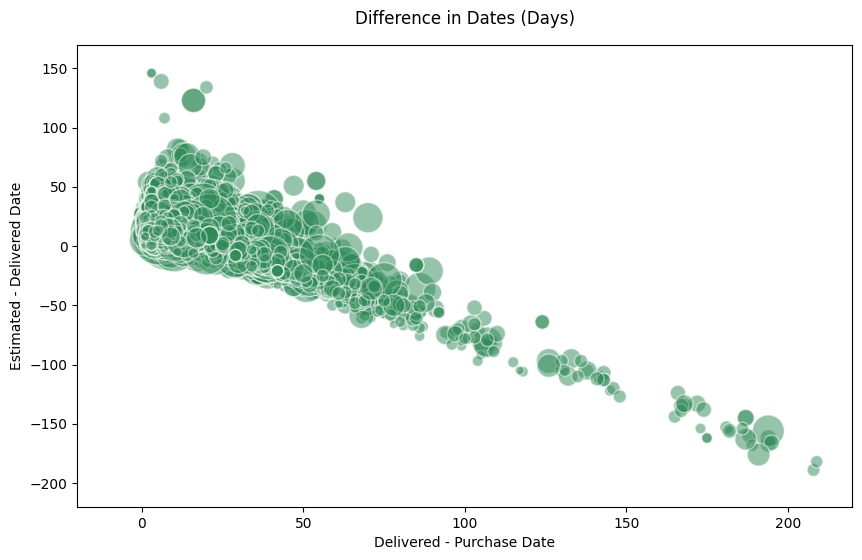

In [ ]:
# Merge the datasets on order_id
merged_data = pd.merge(order_items, orders, on='order_id')

# Filter for delivered orders only
merged_data = merged_data[merged_data['order_status'] == 'delivered']

# Convert date columns to datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])
merged_data['order_delivered_customer_date'] = pd.to_datetime(merged_data['order_delivered_customer_date'])
merged_data['order_estimated_delivery_date'] = pd.to_datetime(merged_data['order_estimated_delivery_date'])

# Calculate the differences in days
merged_data['delivered_minus_purchase'] = (merged_data['order_delivered_customer_date'] - merged_data['order_purchase_timestamp']).dt.days
merged_data['estimated_minus_delivered'] = (merged_data['order_estimated_delivery_date'] - merged_data['order_delivered_customer_date']).dt.days

# Remove rows with NaN values in the calculated columns
merged_data = merged_data.dropna(subset=['delivered_minus_purchase', 'estimated_minus_delivered'])

# Create the scatter plot with bubble sizes based on freight_value
plt.figure(figsize=(10, 6))
plt.scatter(
    merged_data['delivered_minus_purchase'],
    merged_data['estimated_minus_delivered'],
    s=merged_data['freight_value'] * 5,
    alpha=0.5,
    color='seagreen',
    edgecolors="white",
    linewidth=1,

)


# Add labels and title to match the original format
plt.xlabel('Delivered - Purchase Date')
plt.ylabel('Estimated - Delivered Date')
plt.title('Difference in Dates (Days)',
          pad=15)

# Set axis limits to match the original plot
plt.xlim(-20, 220)
plt.ylim(-220, 170)



# Show the plot
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   wd_ord_purchase_timestamp      99441 non-null  object        
 9   order_purchase_date            99441 non-null  object        
 10  days_dif_purchase_deliver      96476 non-null  float64       
 11  dif_est_del_cus

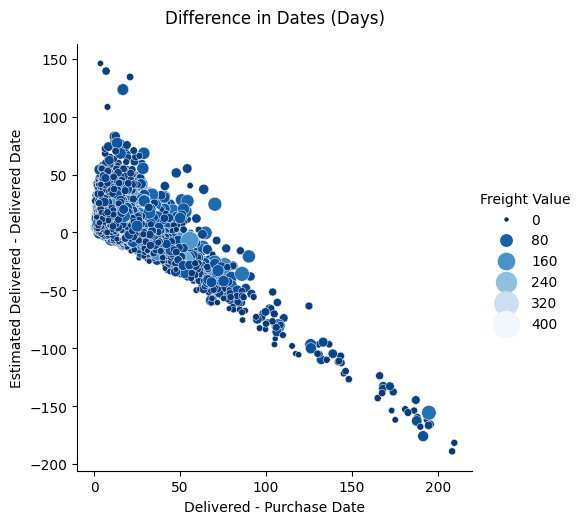

In [ ]:
orders.info()

orders["dif_est_del_cust_date"] = (orders["order_estimated_delivery_date"]\
    - orders["order_delivered_customer_date"]).dt.total_seconds() / 86400

ord_pay_df = orders.merge(order_items,
                      how = "left",
                      on = "order_id")

ord_pay_df.rename({"freight_value": "Freight Value"},
                  axis = 1,
                  inplace = True)

sns.relplot(
    data = ord_pay_df,
    y = "dif_est_del_cust_date",
    x = "days_dif_purchase_deliver",
    hue = "Freight Value",
    palette = "Blues_r",
    size = "Freight Value",
    sizes = (10, 400),
    kind = "scatter"
)
plt.ylabel("Estimated Delivered - Delivered Date")
plt.xlabel("Delivered - Purchase Date")
plt.title("Difference in Dates (Days)", pad = 15)
plt.show()

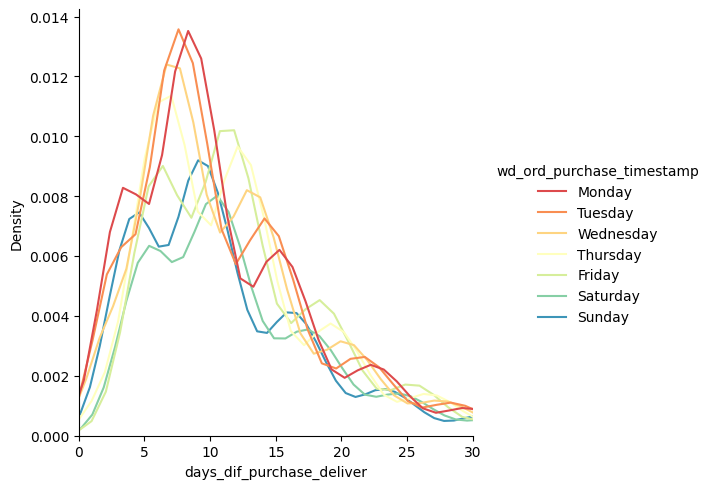

In [ ]:
sns.displot(
    data = orders,
    x = "days_dif_purchase_deliver",
    kind = "kde",
    hue = "wd_ord_purchase_timestamp",
    hue_order = ["Monday", "Tuesday", "Wednesday",\
                 "Thursday", "Friday", "Saturday", "Sunday"],
    palette= "Spectral")
plt.xlim(0, 30)    # included to remove the outliers (>75%) to analyse better
plt.show()
# It looks like there might be some differences between the weekdays.

### Order items Dataset

#### General Inspection

In [ ]:
# Check the first 5 records of the dataset
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
# Check dataset information
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
# Date is not in the correct type
order_items["shipping_limit_date"].head()

,shipping_limit_date
0,2017-09-19 09:45:35
1,2017-05-03 11:05:13
2,2018-01-18 14:48:30
3,2018-08-15 10:10:18
4,2017-02-13 13:57:51


In [ ]:
# Changing it to date type
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"])

In [ ]:
# Check Duplicates
print(len(order_items) == order_items["order_id"].nunique())
# In this dataset, it is expected to have duplicated order_id as they may
# include different items/products.

False


In [ ]:
# Check Missing Data
print(order_items.isna().any())

order_id               False
order_item_id          False
product_id             False
seller_id              False
shipping_limit_date    False
price                  False
freight_value          False
dtype: bool


#### Categorical Features Inspection

No Categorical Features Analysis

#### Numerical Features Inspection

In [ ]:
# Describe quantities, prices and freight values
round(order_items.drop(columns = "shipping_limit_date").describe(), 2)

,order_item_id,price,freight_value
count,112650.00,112650.00,112650.00
mean,1.20,120.65,19.99
std,0.71,183.63,15.81
min,1.00,0.85,0.00
25%,1.00,39.90,13.08
50%,1.00,74.99,16.26
75%,1.00,134.90,21.15
max,21.00,6735.00,409.68


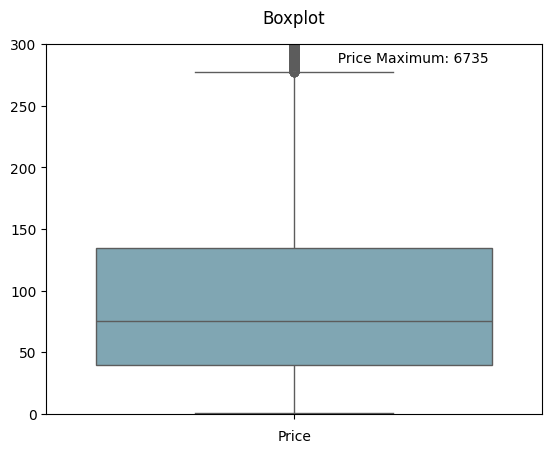

6735.0

In [ ]:
sns.boxplot(
    data = order_items,
    y = "price",
    color = "#7AB"
)
plt.ylim(0, 300)
plt.annotate("          Price Maximum: 6735", xy = (order_items.index[0], 285))
plt.title("Boxplot", pad = 15)
plt.xlabel("Price")
plt.ylabel(None)
plt.show()

order_items["price"].max()

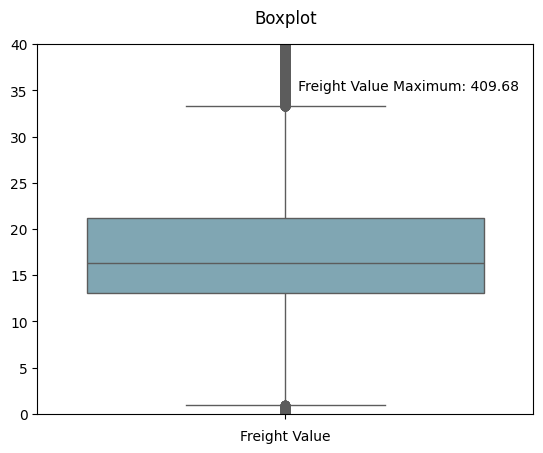

409.68

In [ ]:
sns.boxplot(
    data = order_items,
    y = "freight_value",
    color = "#7AB"
)
plt.ylim(0, 40)
plt.annotate("   Freight Value Maximum: 409.68", xy = (order_items.index[0], 35))
plt.title("Boxplot", pad = 15)
plt.xlabel("Freight Value")
plt.ylabel(None)
plt.show()

order_items["freight_value"].max()

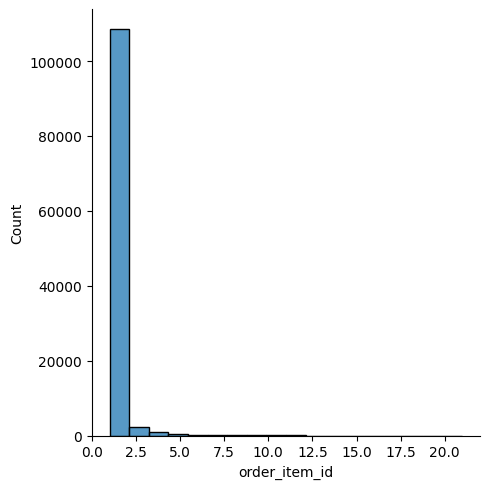

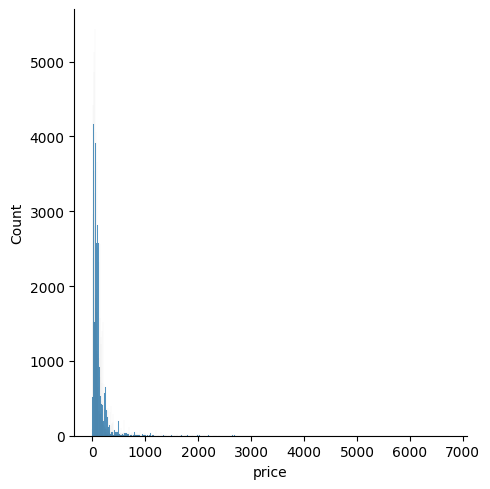

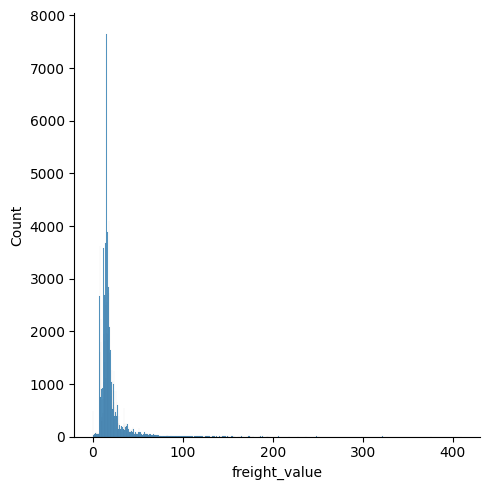

In [ ]:
# Histograms and Boxplot
ord_item_cols_display = ["order_item_id", "price", "freight_value"]

for col in ord_item_cols_display:
    sns.displot(
        data = order_items,
        x = col,
        kind = "hist")
plt.show()

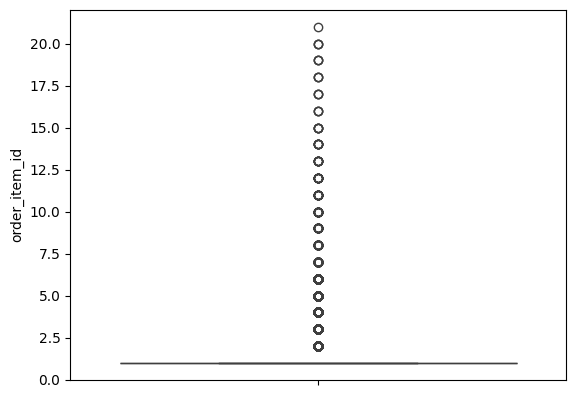

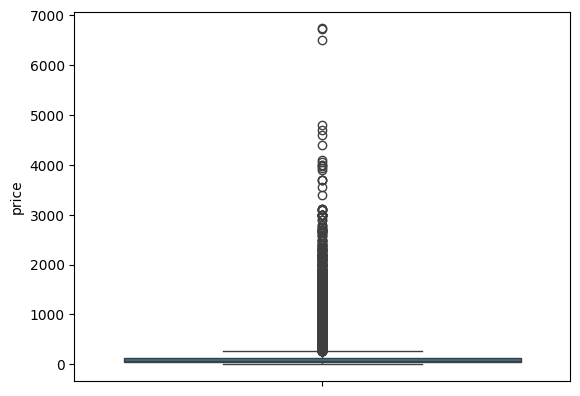

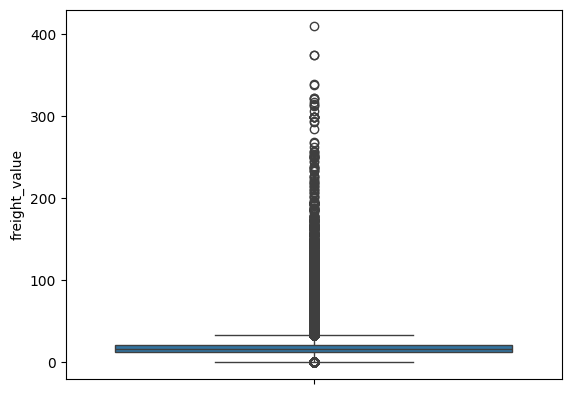

In [ ]:
for col in ord_item_cols_display:
    sns.boxplot(
        data = order_items,
        y = col)
    plt.show()

In [ ]:
# Outliers

# Price - IQR
price_iqr = order_items["price"].quantile(0.75) - order_items["price"].quantile(0.25)
price_upper_outlier = order_items["price"].quantile(0.75) + price_iqr * 1.5
price_lower_outlier = order_items["price"].quantile(0.25) - price_iqr * 1.5

In [ ]:
# The Price lower limit is negative, so we will not consider it
# Percentage of data with price higher than upper limit
ord_it_price_upper_df = order_items[order_items["price"] >= price_upper_outlier]
print("% of data > price upper limit: {}%".format(
    round(len(ord_it_price_upper_df) / len(order_items) * 100, 2)))

print("Quantity of unique products with outlier prices: {}".format(
    ord_it_price_upper_df["product_id"].nunique()))

% of data > price upper limit: 7.48%
Quantity of unique products with outlier prices: 3715


#### Notes

- Feature "shipping_limit_date" had incorrect data type. We changed it from
string to datetime.
- There are order_id duplicates, but it is expected as the same order may
have different products.
- There is no missing data.
- Quick describe, histogram and boxplots of quantities, prices, and freight
values. A lot of outliers.
- Quick analysis of price outliers through IQR. The lower limit was
disregarded as it is a negative value. The % of data higher than price upper
limit represents 7% of total data.
- In addition, the data higher than price upper limit represents around 3700
unique products.


### Reviews Dataset

#### General Inspection

In [ ]:
# Check the first 5 records of the dataset
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
# Check dataset information
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11566 non-null  object
 4   review_comment_message   40968 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
# Feature review_answer_timestamp is not in the correct type
# Changing these features to date type
reviews["review_answer_timestamp"] = pd.to_datetime(reviews["review_answer_timestamp"])

In [ ]:
# Check Duplicates
print(len(reviews) == reviews["review_id"].nunique())

False


In [ ]:
# As there are duplicates, we will check further
# keep = False will show all rows that have duplicated review_id
rev_duplicates_df = reviews[reviews["review_id"].duplicated(keep = False)].\
    sort_values (by = "review_id")



In [ ]:
rev_duplicates_df.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
46678,00130cbe1f9d422698c812ed8ded1919,dfcdfc43867d1c1381bfaf62d6b9c195,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecid...",2018-03-07 00:00:00,2018-03-20 18:08:23
29841,00130cbe1f9d422698c812ed8ded1919,04a28263e085d399c97ae49e0b477efa,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecid...",2018-03-07 00:00:00,2018-03-20 18:08:23
90677,0115633a9c298b6a98bcbe4eee75345f,78a4201f58af3463bdab842eea4bc801,5,NaN,NaN,2017-09-21 00:00:00,2017-09-26 03:27:47
63193,0115633a9c298b6a98bcbe4eee75345f,0c9850b2c179c1ef60d2855e2751d1fa,5,NaN,NaN,2017-09-21 00:00:00,2017-09-26 03:27:47
92876,0174caf0ee5964646040cd94e15ac95e,f93a732712407c02dce5dd5088d0f47b,1,NaN,Produto entregue dentro de embalagem do fornec...,2018-03-07 00:00:00,2018-03-08 03:00:53
57280,0174caf0ee5964646040cd94e15ac95e,74db91e33b4e1fd865356c89a61abf1f,1,NaN,Produto entregue dentro de embalagem do fornec...,2018-03-07 00:00:00,2018-03-08 03:00:53
54832,017808d29fd1f942d97e50184dfb4c13,8daaa9e99d60fbba579cc1c3e3bfae01,5,NaN,NaN,2018-03-02 00:00:00,2018-03-05 01:43:30
99167,017808d29fd1f942d97e50184dfb4c13,b1461c8882153b5fe68307c46a506e39,5,NaN,NaN,2018-03-02 00:00:00,2018-03-05 01:43:30
20621,0254bd905dc677a6078990aad3331a36,5bf226cf882c5bf4247f89a97c86f273,1,NaN,O pedido consta de 2 produtos e até agora rece...,2017-09-09 00:00:00,2017-09-13 09:52:44
96080,0254bd905dc677a6078990aad3331a36,331b367bdd766f3d1cf518777317b5d9,1,NaN,O pedido consta de 2 produtos e até agora rece...,2017-09-09 00:00:00,2017-09-13 09:52:44


In [ ]:
rev_duplicates_df.iloc[:2,:2]
# By checking a sample of 10 rows and 2 rows, we can see that the duplicated review_id,
# also have repeated review_answer_timestamp. However, they have different
# order_id
# We will need to check further

,review_id,order_id
46678,00130cbe1f9d422698c812ed8ded1919,dfcdfc43867d1c1381bfaf62d6b9c195
29841,00130cbe1f9d422698c812ed8ded1919,04a28263e085d399c97ae49e0b477efa


In [ ]:
# Check Missing Data
print(reviews.isna().sum())
# There are review titles and messages with missing values, but
# they still have scores

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87658
review_comment_message     58256
review_creation_date           0
review_answer_timestamp        0
dtype: int64


#### Categorical Features Inspection

No Analysis

#### Numerical Features Inspection

In [ ]:
reviews.describe()

,review_score,review_answer_timestamp
count,99224.000000,99224
mean,4.086421,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-07 18:32:28
25%,4.000000,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-20 12:11:21.500000
max,5.000000,2018-10-29 12:27:35
std,1.347579,NaN


<ipython-input-169-23eea9d5638d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


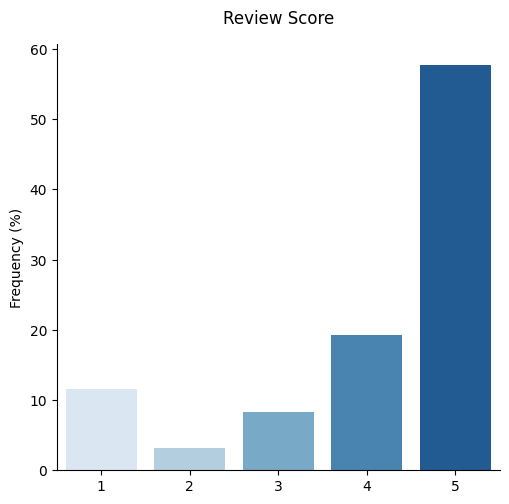

In [ ]:
# Visualization of review_score
# Convertion to year-month, but first we need to transform it as str
rev_score_per = reviews["review_score"].value_counts(normalize = True) * 100

sns.catplot(
    x = rev_score_per.index,
    y = rev_score_per.values,
    kind = "bar",
    palette = "Blues")
plt.title("Review Score", pad = 15)
plt.xlabel(None)
plt.ylabel ("Frequency (%)")
plt.show()

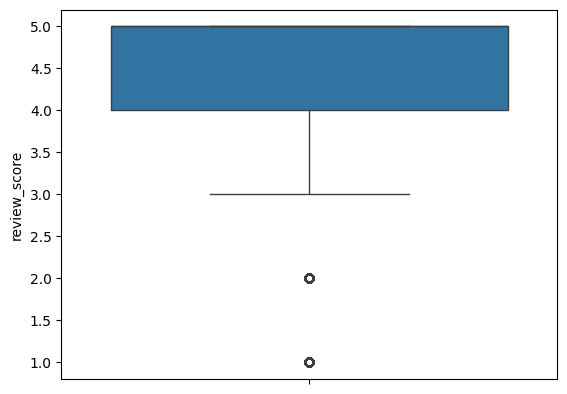

In [ ]:
sns.boxplot(
    data = reviews,
    y = "review_score")
plt.show()

#### Notes

- Feature review_answer_timestamp was with incorrect data type. We changed them from string to datetime.
- There is missing data in review titles and messages columns, but they
still have scores.
- It is possible to get some insights from reviews.

** Further Steps/ Analysis / Only ideas for discussion **
- How should we handle missing data? As we still have scores, we may keep it.


### Payments Dataset

#### General Inspection

In [ ]:
# Check the first 5 records of the dataset
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
# Check dataset information
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
# Check Duplicates
print(len(payments) == payments["order_id"].nunique())

False


In [ ]:
# As there are duplicates, we will check further
# keep = False will show all rows that have duplicated review_id
pay_duplicates_df = payments[payments["order_id"].duplicated(keep = False)].\
    sort_values (by = "order_id")

In [ ]:
pay_duplicates_df.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
80856,0016dfedd97fc2950e388d2971d718c7,2,voucher,1,17.92
89575,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
20036,002f19a65a2ddd70a090297872e6d64e,1,voucher,1,44.11
98894,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
30155,0071ee2429bc1efdc43aa3e073a5290e,2,voucher,1,92.44
10244,0071ee2429bc1efdc43aa3e073a5290e,1,voucher,1,100.00
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50
15298,009ac365164f8e06f59d18a08045f6c4,6,voucher,1,4.17
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45
285,009ac365164f8e06f59d18a08045f6c4,5,voucher,1,8.75


In [ ]:
pay_duplicates_df.iloc[:2,:5]
# By checking the first 10 rows and 2 rows, we can see that the duplicated
# order_id are due to different payments type, installments and values

,order_id,payment_sequential,payment_type,payment_installments,payment_value
80856,0016dfedd97fc2950e388d2971d718c7,2,voucher,1,17.92
89575,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63


In [ ]:
# Check Missing Data
print(payments.isna().sum())
# No missing data

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


#### Categorical Features Inspection


In [ ]:
# Check payment type
print("Number of unique payments type: {}".format(
    payments["payment_type"].nunique()))

Number of unique payments type: 5


In [ ]:
# Frequency of payments type in %
print(payments["payment_type"].value_counts(normalize = True) * 100)
# Although it looked like we did not have missing data, we have a class of
# "not_defined"

payment_type
credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: proportion, dtype: float64


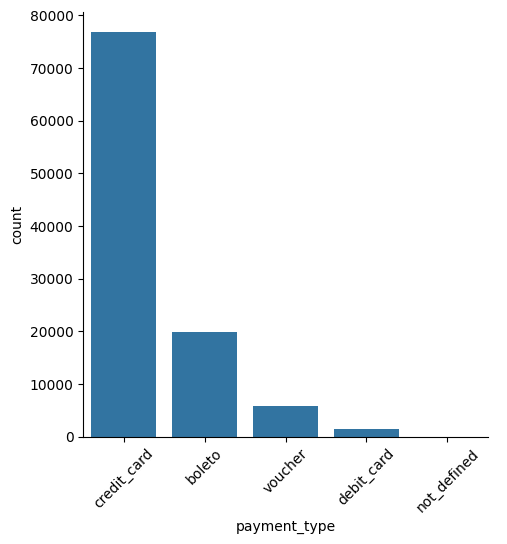

In [ ]:
# Visualization
sns.catplot(
    data = payments,
    x = "payment_type",
    kind = "count")
plt.xticks(rotation = 45)
plt.show()

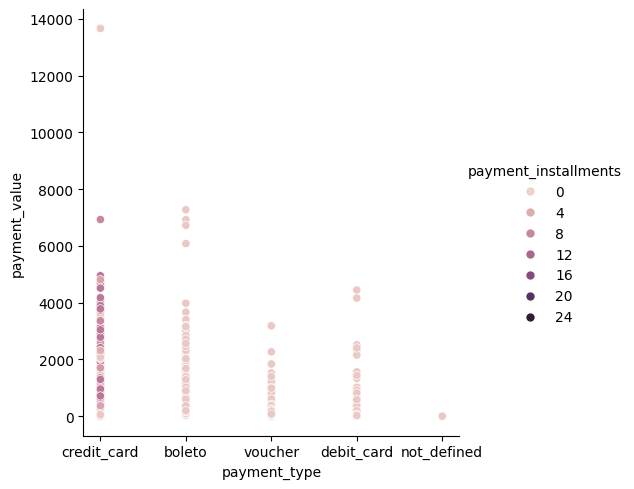

In [ ]:
sns.relplot(
    data = payments,
    x = "payment_type",
    y = "payment_value",
    hue = "payment_installments",
    kind = "scatter")
plt.show()

#### Numerical Features Inspection

In [ ]:
round(payments.describe(), 2)

,payment_sequential,payment_installments,payment_value
count,103886.00,103886.00,103886.00
mean,1.09,2.85,154.10
std,0.71,2.69,217.49
min,1.00,0.00,0.00
25%,1.00,1.00,56.79
50%,1.00,1.00,100.00
75%,1.00,4.00,171.84
max,29.00,24.00,13664.08


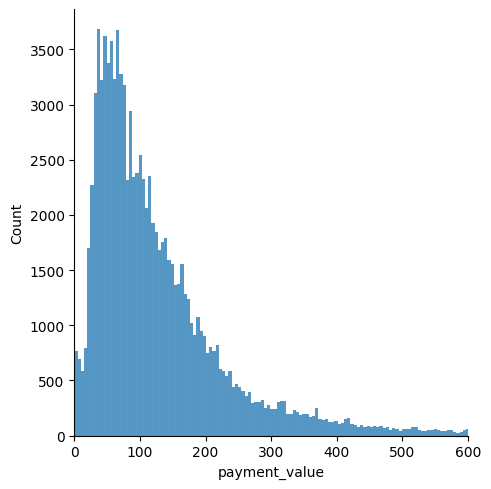

In [ ]:
# Histogram of payment_value
sns.displot(
    data = payments,
    x = "payment_value",
    kind = "hist")
plt.xlim(0, 600)    # a big tail to the right (skewed)
plt.show()

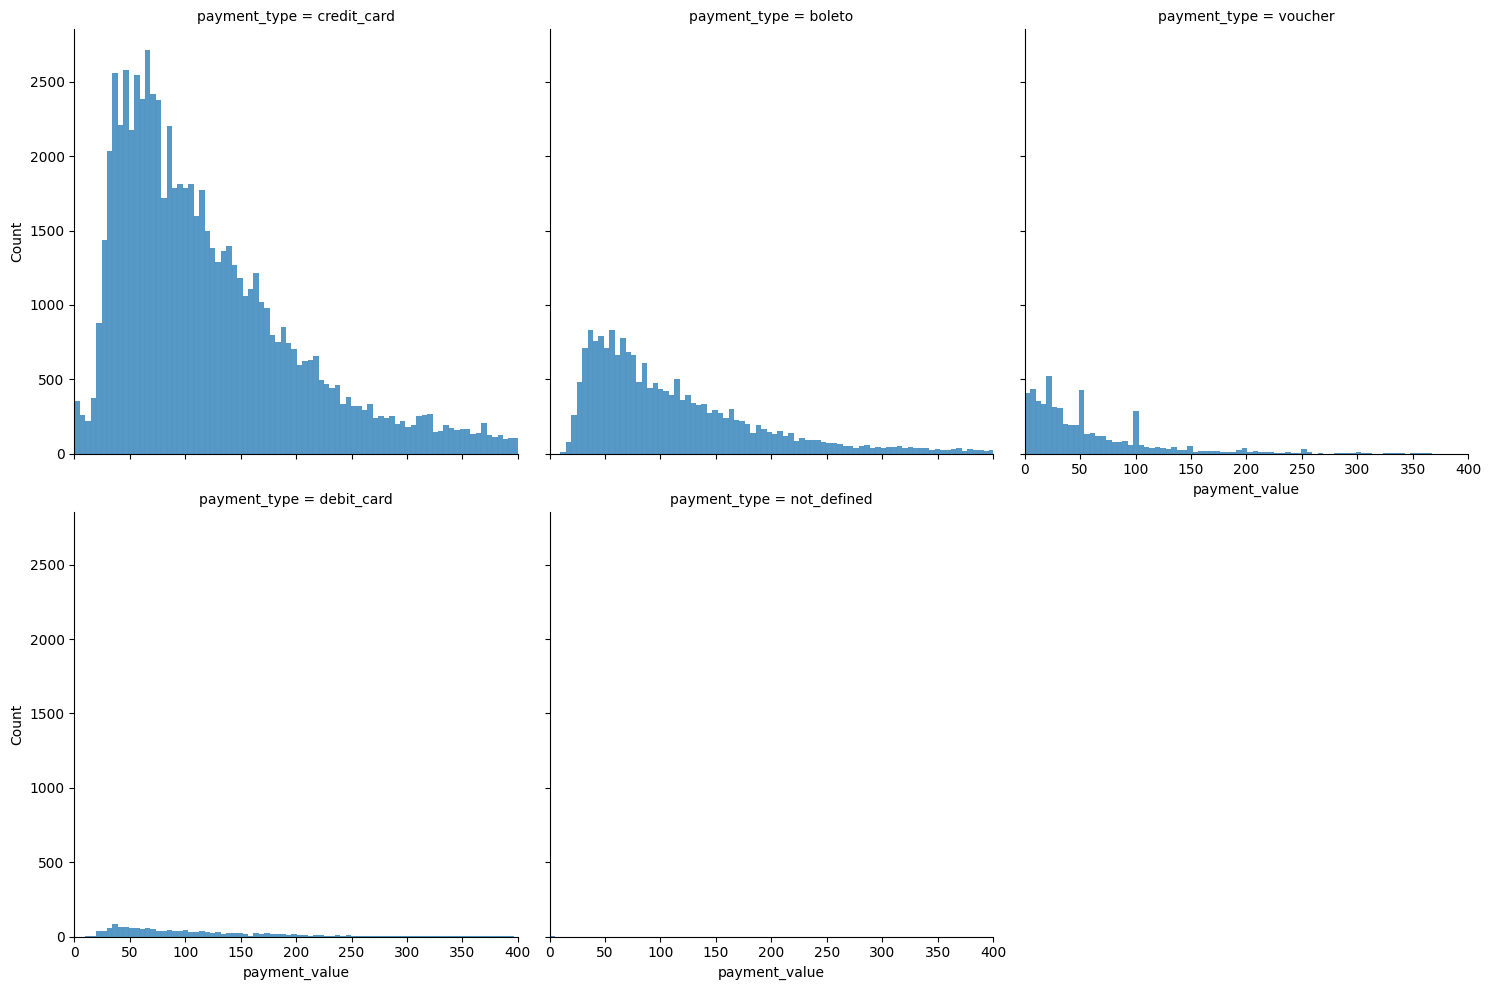

In [ ]:
# Analysis of payment value by payment type
sns.displot(
    data = payments,
    x = "payment_value",
    kind = "hist",
    col = "payment_type",
    col_wrap = 3)
plt.xlim(0, 400)    # a big tail to the right (skewed)
plt.show()

<ipython-input-105-bb6c1c51f0ed>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


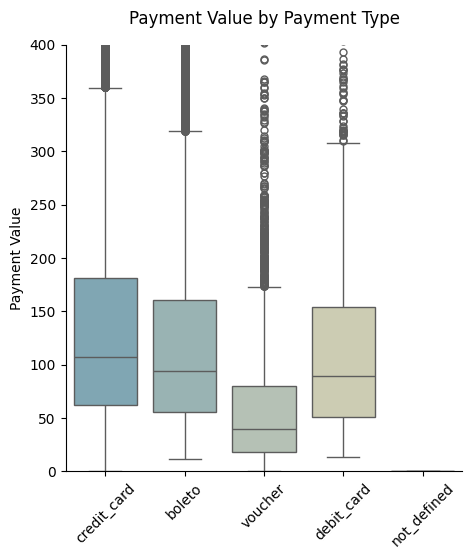

In [ ]:
sns.catplot(
    data = payments,
    y = "payment_value",
    kind = "box",
    x = "payment_type",
    palette = "blend:#7AB,#EDA")
plt.ylim(0, 400)    # a big tail to the right (skewed)
plt.xlabel(None)
plt.ylabel("Payment Value")
plt.title("Payment Value by Payment Type", pad = 15)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
payments.groupby("payment_type")["payment_value"].\
agg([min, np.mean, np.median, max]).sort_values(by = "mean", ascending = False)

<ipython-input-106-e3740991438d>:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  agg([min, np.mean, np.median, max]).sort_values(by = "mean", ascending = False)
<ipython-input-106-e3740991438d>:2: FutureWarning: The provided callable <function mean at 0x7e96eebb53a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  agg([min, np.mean, np.median, max]).sort_values(by = "mean", ascending = False)
<ipython-input-106-e3740991438d>:2: FutureWarning: The provided callable <function median at 0x7e96ebe16a20> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  agg

,min,mean,median,max
payment_type,,,,
credit_card,0.01,163.319021,106.87,13664.08
boleto,11.62,145.034435,93.89,7274.88
debit_card,13.38,142.570170,89.30,4445.50
voucher,0.00,65.703354,39.28,3184.34
not_defined,0.00,0.000000,0.00,0.00


<ipython-input-163-3df6c43a8052>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(
<ipython-input-163-3df6c43a8052>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


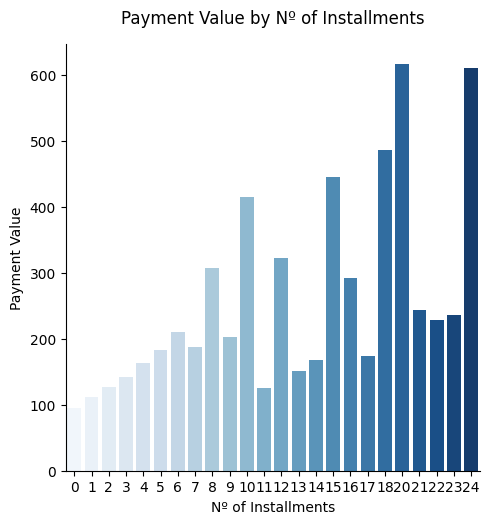

In [ ]:
# Boxplot of payment_installments
sns.catplot(
    data = payments,
    y = "payment_value",
    x = "payment_installments",
    kind = "bar",
    palette = "Blues",
    ci = None)
plt.title("Payment Value by Nº of Installments", pad = 15)
plt.ylabel("Payment Value")
plt.xlabel("Nº of Installments")
plt.show()

Note: Analysing the Payment Value from Payments Table and the Price and Freight_Value from Order_Items Table, it's possible do note that the Payment Value is the total amount of the order (Price + Freight Value) as it can be seen at the picture below.

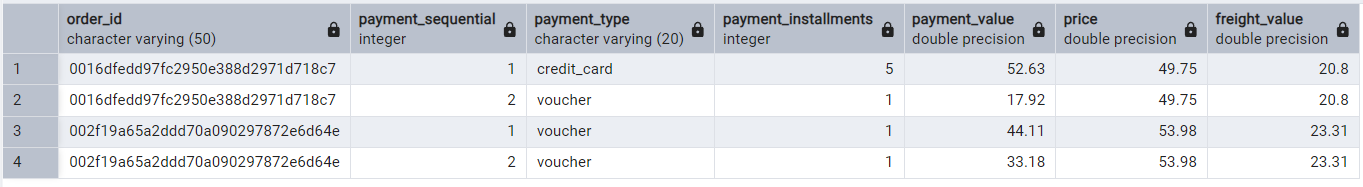

#### Notes

- There are duplicated order_id but they are due to different payments type,
installments and values.
- No missing data.
- There are 4 different payment types.
- There is an addition class that is "not_defined" but only represents 0.002%.
- Credit card represents 74% of total payment types.
- For higher number of installments, the credit card is the primary choice.
- For lower number of installments, all payments type are considered.
- The payment value feature has a big tail (right skewed)  
- The voucher is mostly used for low payment values.



### Geolocation Dataset

#### General Inspection

In [ ]:
# Check the first 5 records of the dataset
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-2.354.562.128.115.260,-4.663.929.204.800.160,sao paulo,SP
1,1046,-23.546.081.127.035.500,-4.664.482.029.837.150,sao paulo,SP
2,1046,-2.354.612.896.641.460,-4.664.295.148.361.130,sao paulo,SP
3,1041,-235.443.921.648.681,-4.663.949.930.627.840,sao paulo,SP
4,1035,-23.541.577.961.711.400,-4.664.160.722.329.610,sao paulo,SP


In [ ]:
# Check data types
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   geolocation_zip_code_prefix  1000163 non-null  int64 
 1   geolocation_lat              1000163 non-null  object
 2   geolocation_lng              1000163 non-null  object
 3   geolocation_city             1000163 non-null  object
 4   geolocation_state            1000163 non-null  object
dtypes: int64(1), object(4)
memory usage: 38.2+ MB


In [ ]:
# Zip code in stored as int. However, as zip codes are identifiers and
# not values meant for calculations, we will consider it as string.
geolocation["geolocation_zip_code_prefix"] = geolocation["geolocation_zip_code_prefix"]\
    .astype(str)

In [ ]:
# Check Missing Data
print(geolocation.isna().any())    # or .sum()

geolocation_zip_code_prefix    False
geolocation_lat                False
geolocation_lng                False
geolocation_city               False
geolocation_state              False
dtype: bool


# **Data Preparation**

## Star Schema Building

As our classification model will aim to predict whether a given customer will place an order or not, our fact table in the Star Schema will be a join of the order and order_items tables.

This way, we will have information about the types of products, the order amount, and the freight at the order level.

### Building fact_order

To use an SQL engine with Python, we will have to use the **sqlalchemy** library.

From this library, we will use the create_engine function to create an SQL engine. In this case, we will use SQLite because it is the native SQL database of Google Colab.

In [18]:
engine = create_engine('sqlite:///:memory:') # Cria um motor SQL utilizando o banco de dados SQLite

Now, let's add to our local database the tables that we want to manipulate to create our Star Schema.

In [19]:
orders.to_sql('orders', engine, index=False) # Adicionando a tabela de orders

99441

In [20]:
order_items.to_sql('order_items', engine, index=False) # Adicionando a tabela de order_items

112650

In [21]:
reviews.to_sql('dim_reviews', engine, index=False) # Adicionando a tabela de reviews

99224

In [22]:
payments.to_sql('dim_payments', engine, index=False) # Adicionando a tabela de payments

103886

In [23]:
customers.to_sql('dim_customers', engine, index=False) # Adicionando a tabela de customers

99441

Creating the fact_order by performing a LEFT JOIN of the orders table with the order_items table and calculating some features from order_items.

In [24]:
query_fact_order = '''

WITH order_items_features AS (
	SELECT
		order_id,
		COUNT(order_item_id) AS order_quantity,
		COUNT(DISTINCT product_id) AS order_qtd_types_products,
		SUM(price) AS order_products_amount,
		SUM(freight_value) AS order_freight_value
	FROM order_items
	GROUP BY order_id
)

SELECT
	o.order_id,
	o.customer_id,
	o.order_status,
	o.order_purchase_timestamp,
	o.order_approved_at,
	o.order_delivered_carrier_date,
	o.order_delivered_customer_date,
	o.order_estimated_delivery_date,
	COALESCE(oif.order_quantity, 0) AS order_quantity, -- Default 0 if Null
	COALESCE(oif.order_qtd_types_products, 0) AS order_qtd_types_products, -- Default 0 if Null
	COALESCE(oif.order_products_amount, 0) AS order_products_amount, -- Default 0 if Null
	COALESCE(oif.order_freight_value, 0) AS order_freight_value -- Default 0 if Null
FROM orders o
LEFT JOIN order_items_features oif ON o.order_id = oif.order_id
'''


Assigning the SQL query that creates the fact order to a variable.

In [25]:
fact_order = pd.read_sql(query_fact_order, engine)
fact_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_quantity,order_qtd_types_products,order_products_amount,order_freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,1,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,1,72.00,13.08
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,1,174.90,20.10
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,1,205.99,65.02
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,1,359.98,81.18


Create the fact_order table within the SQL database using the query above.

In [26]:
fact_order.to_sql('fact_order', con=engine, index=False)

99441

Visualize the fact_order table that was created within the SQL database.

In [27]:
pd.read_sql_table('fact_order', engine)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_quantity,order_qtd_types_products,order_products_amount,order_freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,1,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,1,72.00,13.08
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,1,174.90,20.10
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,1,205.99,65.02
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,1,359.98,81.18


Inspecting our SQL database.

In [28]:
inspector = inspect(engine)

In [29]:
print(inspector.get_table_names())

['dim_customers', 'dim_payments', 'dim_reviews', 'fact_order', 'order_items', 'orders']


Deleting tables from the SQL database that we will no longer use.

In [30]:
metadata = MetaData()
metadata.reflect(bind=engine)

In [31]:
tabela = Table('order_items', metadata)

In [32]:
tabela.drop(engine)

In [33]:
tabela = Table('orders', metadata)

In [34]:
tabela.drop(engine)

Final inspection of our SQL database.

In [35]:
inspector = inspect(engine)

In [36]:
print(inspector.get_table_names())

['dim_customers', 'dim_payments', 'dim_reviews', 'fact_order']


### Star Schema Logical Diagram

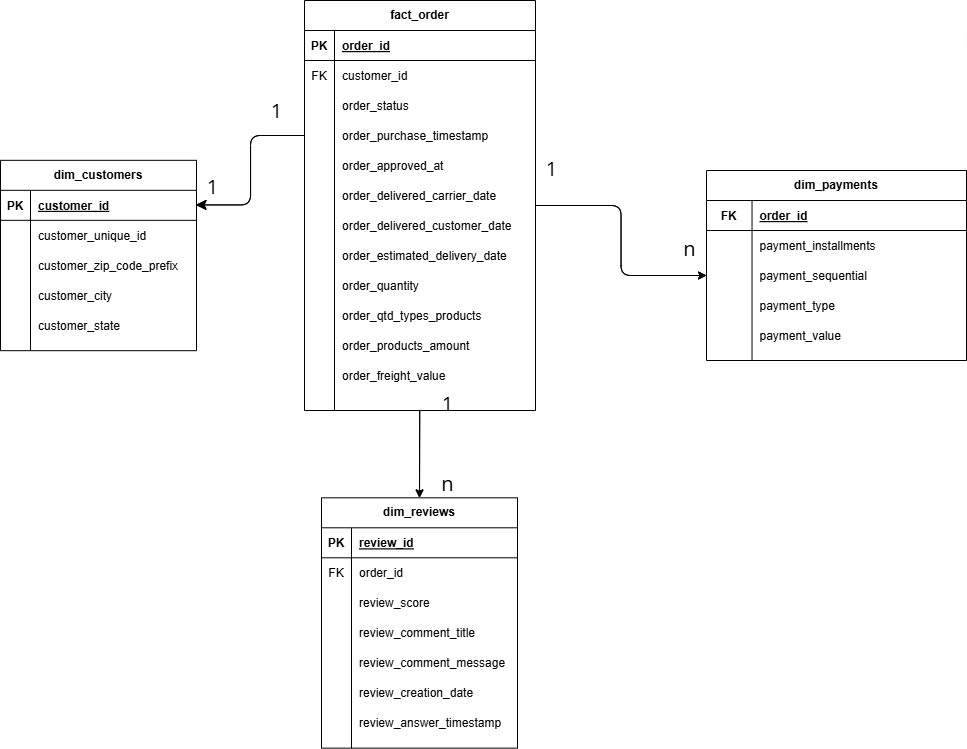

## Creating the Features Table

### Data Hierarchy

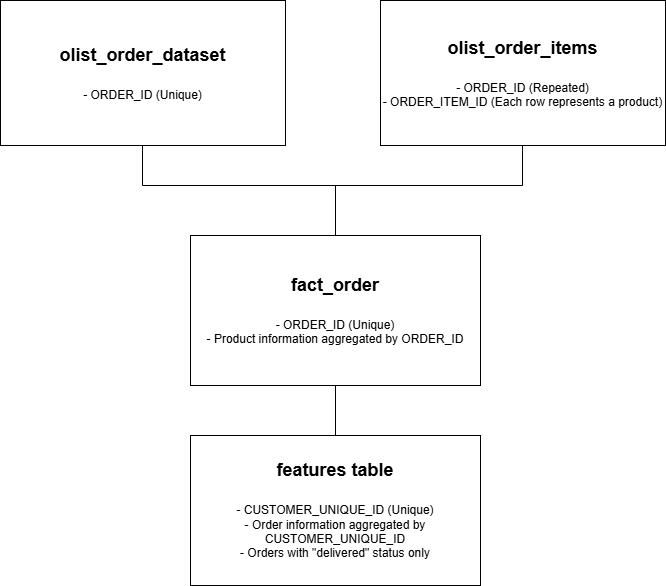

### Features Table

Creation of a features table for a Classification model.

TARGET - Verify for each customer if the customer who purchased up to 05/31/2017 also purchased after 05/31/2017 (0 = did not buy again, 1 = bought again).


Features:
- Total quantity of products per customer,
- Total number of product types per customer,
- Total amount spent per customer,
- Total freight cost spent per customer,
- Average number of days waiting for order receipt per customer,
- Average on-time delivery rate,
- Average number of payments per customer,
- Average review scores per customer
- Prefers to buy during the day or at night (day = 0, night = 1)
- Prefers to buy on weekdays or weekends (weekdays = 0, weekend = 1)
- Favorite payment type (1 = not_defined, 2 = boleto, 3 = debit_card, 4 = voucher, 5 = credit_card)
- Lives in São Paulo or another State (sp = 0, others = 1)


NOTE: I filtered only 'delivered' orders. This decision was made because we have already seen that the 'delivered' order_status corresponds to more than 97% of all orders, and thus we eliminate missing values from some date columns.

In [37]:
query_predict_next_order_delivered = '''
WITH PurchaseInfo AS (
    SELECT
        dc.customer_unique_id,
        fo.order_purchase_timestamp,
        fo.order_quantity,
        fo.order_qtd_types_products,
        fo.order_freight_value,
        JULIANDAY(fo.order_delivered_customer_date) - JULIANDAY(fo.order_purchase_timestamp) AS waiting_days,
        JULIANDAY(fo.order_estimated_delivery_date) - JULIANDAY(fo.order_delivered_customer_date) AS del_comp_days,
        pt.payment_installments,
        rv.review_score,
        CASE
            WHEN CAST(STRFTIME('%H', fo.order_purchase_timestamp) AS INTEGER) < 18 THEN 'day'
            ELSE 'night'
        END AS purch_d_n,
        CASE
            WHEN STRFTIME('%w', fo.order_purchase_timestamp) IN ('1', '2', '3', '4', '5') THEN 'weekdays'
            ELSE 'weekend'
        END AS weekday_weekend,
        CASE
            WHEN dc.customer_state IN ('SP', 'RJ', 'MG') THEN 'sp_rj_mg'
            ELSE 'other_state'
        END AS state,
        pt.payment_type,
        CASE
            WHEN STRFTIME('%Y-%m-%d', fo.order_purchase_timestamp) <= '2017-05-31' THEN 'before'
            ELSE 'after'
        END AS purchase_period_group
    FROM
        fact_order fo
    LEFT JOIN
        dim_customers dc ON fo.customer_id = dc.customer_id
    LEFT JOIN
        dim_payments pt ON fo.order_id = pt.order_id
    LEFT JOIN
        dim_reviews rv ON fo.order_id = rv.order_id
    WHERE
        fo.order_status = 'delivered'
),
RankedPreferences AS (
    SELECT
        customer_unique_id,
        purchase_period_group,
        SUM(CASE WHEN purchase_period_group = 'before' THEN order_quantity ELSE 0 END) AS tt_product_qty,
        SUM(CASE WHEN purchase_period_group = 'before' THEN order_qtd_types_products ELSE 0 END) AS tt_prd_types_qty,
        SUM(CASE WHEN purchase_period_group = 'before' THEN order_freight_value ELSE 0 END) AS tt_freight,
        AVG(CASE WHEN purchase_period_group = 'before' THEN waiting_days ELSE 0 END) AS avg_waiting_days,
        AVG(CASE WHEN purchase_period_group = 'before' THEN del_comp_days ELSE 0 END) AS avg_del_comp_days,
        AVG(CASE WHEN purchase_period_group = 'before' THEN payment_installments ELSE 0 END) AS avg_installments,
        AVG(CASE WHEN purchase_period_group = 'before' THEN review_score ELSE 0 END) AS avg_review_score,
        FIRST_VALUE(purch_d_n) OVER (PARTITION BY customer_unique_id, purchase_period_group ORDER BY COUNT(*) DESC) AS pref_purch_d_n,
        FIRST_VALUE(weekday_weekend) OVER (PARTITION BY customer_unique_id, purchase_period_group ORDER BY COUNT(*) DESC) AS pref_purch_wd,
        FIRST_VALUE(payment_type) OVER (PARTITION BY customer_unique_id, purchase_period_group ORDER BY COUNT(*) DESC) AS pref_pay_type,
        FIRST_VALUE(state) OVER (PARTITION BY customer_unique_id, purchase_period_group ORDER BY COUNT(*) DESC) AS sp_rj_mg_or_other_state,
        ROW_NUMBER() OVER (PARTITION BY customer_unique_id, purchase_period_group ORDER BY COUNT(*) DESC) as rn_pref
    FROM
        PurchaseInfo
    GROUP BY
        customer_unique_id,
        purchase_period_group,
        purch_d_n,
        weekday_weekend,
        payment_type,
        state
),
CustomersBeforeData AS (
    SELECT
        customer_unique_id,
        tt_product_qty,
        tt_prd_types_qty,
        tt_freight,
        COALESCE(ROUND(avg_waiting_days, 0),0) AS avg_waiting_days,
        COALESCE(ROUND(avg_del_comp_days, 0),0) AS avg_del_comp_days,
        COALESCE(ROUND(avg_installments, 0),0) AS avg_installments,
        avg_review_score,
        COALESCE(pref_purch_d_n, 0) AS pref_purch_d_n,
        COALESCE(pref_purch_wd, 0) AS pref_purch_wd,
        COALESCE(pref_pay_type, 0) AS pref_pay_type,
        COALESCE(sp_rj_mg_or_other_state, 0) AS sp_rj_mg_or_other_state
    FROM RankedPreferences
    WHERE purchase_period_group = 'before' AND rn_pref = 1
),
CustomersAfterData AS (
    SELECT DISTINCT customer_unique_id
    FROM PurchaseInfo
    WHERE purchase_period_group = 'after'
)
SELECT
    cb.customer_unique_id,
    CASE
        WHEN ca.customer_unique_id IS NOT NULL THEN 1
        ELSE 0
    END AS retention,
    cb.tt_product_qty,
    cb.tt_prd_types_qty,
    cb.tt_freight,
    cb.avg_waiting_days,
    cb.avg_del_comp_days,
    cb.avg_installments,
    cb.avg_review_score,
    cb.pref_purch_d_n,
    cb.pref_purch_wd,
    cb.pref_pay_type,
    cb.sp_rj_mg_or_other_state
FROM
    CustomersBeforeData cb
LEFT JOIN
    CustomersAfterData ca ON cb.customer_unique_id = ca.customer_unique_id;
'''

Loading the table into a variable and showing the table.

In [38]:
predict_next_order_delivered = pd.read_sql(query_predict_next_order_delivered, engine)
predict_next_order_delivered.head()

,customer_unique_id,retention,tt_product_qty,tt_prd_types_qty,tt_freight,avg_waiting_days,avg_del_comp_days,avg_installments,avg_review_score,pref_purch_d_n,pref_purch_wd,pref_pay_type,sp_rj_mg_or_other_state
0,0000f46a3911fa3c0805444483337064,0,1,1,17.22,26.0,1.0,8.0,3.0,night,weekdays,credit_card,other_state
1,0005e1862207bf6ccc02e4228effd9a0,0,1,1,15.12,4.0,28.0,3.0,4.0,night,weekend,credit_card,sp_rj_mg
2,00115fc7123b5310cf6d3a3aa932699e,0,1,1,16.12,11.0,32.0,1.0,4.0,night,weekend,credit_card,other_state
3,0011805441c0d1b68b48002f1d005526,0,1,1,28.14,18.0,12.0,10.0,3.0,day,weekdays,credit_card,other_state
4,00191a9719ef48ebb5860b130347bf33,0,1,1,10.96,15.0,18.0,2.0,3.0,day,weekdays,credit_card,sp_rj_mg


In [39]:
predict_next_order_delivered = predict_next_order_delivered[predict_next_order_delivered["pref_pay_type"] != "0"] #

predict_next_order_delivered["pref_pay_type"].value_counts()

,count
pref_pay_type,
credit_card,8142
boleto,2334
voucher,237
debit_card,105
0,1


In [40]:
predict_next_order_delivered.isna().sum()

,0
customer_unique_id,0
retention,0
tt_product_qty,0
tt_prd_types_qty,0
tt_freight,0
avg_waiting_days,0
avg_del_comp_days,0
avg_installments,0
avg_review_score,80
pref_purch_d_n,0


Prepare Table

In [41]:
# Join orders and customers tables
ord_cust_df = customers.merge(fact_order,
                              how = "left",
                              on = "customer_id")

# Inspect
print(ord_cust_df.info())

# Change data type
ord_cust_df["order_purchase_timestamp"] = pd.to_datetime(ord_cust_df["order_purchase_timestamp"])

# Consider only the scope of delivered orders before the split date
# Define split date
split_date = "2017-12-31 23:59:59"
ret_del_ord_df = ord_cust_df[(ord_cust_df["order_purchase_timestamp"] <= split_date) &
                          (ord_cust_df["order_status"] == "delivered")]

# Inspect
print(ret_del_ord_df.info())
ret_del_ord_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    99441 non-null  object 
 1   customer_unique_id             99441 non-null  object 
 2   customer_zip_code_prefix       99441 non-null  int64  
 3   customer_city                  99441 non-null  object 
 4   customer_state                 99441 non-null  object 
 5   order_id                       99441 non-null  object 
 6   order_status                   99441 non-null  object 
 7   order_purchase_timestamp       99441 non-null  object 
 8   order_approved_at              99281 non-null  object 
 9   order_delivered_carrier_date   97658 non-null  object 
 10  order_delivered_customer_date  96476 non-null  object 
 11  order_estimated_delivery_date  99441 non-null  object 
 12  order_quantity                 99441 non-null 

,0
customer_id,43695
customer_unique_id,42395
customer_zip_code_prefix,12058
customer_city,3252
customer_state,27
order_id,43695
order_status,1
order_purchase_timestamp,43471
order_approved_at,41683
order_delivered_carrier_date,40668


Calculate RFM and Tenure

Definitions:
*   Recency - days since last customer transaction
*   Frequency - number of transactions in the period
*   Monetary Value - total spend in the the period

The recommend period is 12 months, but we can consider smaller periods. In this case, it will be since the beggining of the data (2016-10) until the defined split date.

In [42]:
# Calculate by customer
datamart = ret_del_ord_df.groupby("customer_unique_id").agg(
    recency = ("order_purchase_timestamp", lambda x: pd.to_datetime(split_date) - x.max()),
    frequency = ("order_id", "count"),
    monetary_value = ("order_products_amount", "sum"),
    tenure = ("order_purchase_timestamp", lambda x: pd.to_datetime(split_date) - x.min())
).reset_index()

# Change recency and tenure to be in number of days as float
# 1 day has 86400 seconds
datamart["recency"] = datamart["recency"].dt.total_seconds() / 86400
datamart["tenure"] = datamart["tenure"].dt.total_seconds() / 86400

# Inspect
print(datamart.info())
print(datamart.isna().any())
print(datamart.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42395 entries, 0 to 42394
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  42395 non-null  object 
 1   recency             42395 non-null  float64
 2   frequency           42395 non-null  int64  
 3   monetary_value      42395 non-null  float64
 4   tenure              42395 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB
None
customer_unique_id    False
recency               False
frequency             False
monetary_value        False
tenure                False
dtype: bool
            recency     frequency  monetary_value        tenure
count  42395.000000  42395.000000    42395.000000  42395.000000
mean     138.778585      1.030664      141.605684    140.058965
std       98.117676      0.194036      223.357173     98.333272
min        0.021157      1.000000        2.290000      0.021157
25%       

### Join "Predict Next Order Delivered" and "RFM" Tables

In [43]:
# Join RFM to the predict_next_order_delivered
predict_next_order_del_rfm = predict_next_order_delivered.merge(datamart,
                                                                how = "left",
                                                                on = "customer_unique_id")

# Inspect
print(predict_next_order_del_rfm.info())
print(predict_next_order_del_rfm.isna().sum())
print(predict_next_order_del_rfm.head())

predict_next_order_del_rfm["retention"].value_counts(normalize = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10819 entries, 0 to 10818
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_unique_id       10819 non-null  object 
 1   retention                10819 non-null  int64  
 2   tt_product_qty           10819 non-null  int64  
 3   tt_prd_types_qty         10819 non-null  int64  
 4   tt_freight               10819 non-null  float64
 5   avg_waiting_days         10819 non-null  float64
 6   avg_del_comp_days        10819 non-null  float64
 7   avg_installments         10819 non-null  float64
 8   avg_review_score         10739 non-null  float64
 9   pref_purch_d_n           10819 non-null  object 
 10  pref_purch_wd            10819 non-null  object 
 11  pref_pay_type            10819 non-null  object 
 12  sp_rj_mg_or_other_state  10819 non-null  object 
 13  recency                  10819 non-null  float64
 14  frequency             

,proportion
retention,
0,0.970053
1,0.029947


## Correlation

Notes:
*   Pearson correlation should be used only for continuous variables
*   Therefore, we will use Spearman correlation to also consideer discrete variables


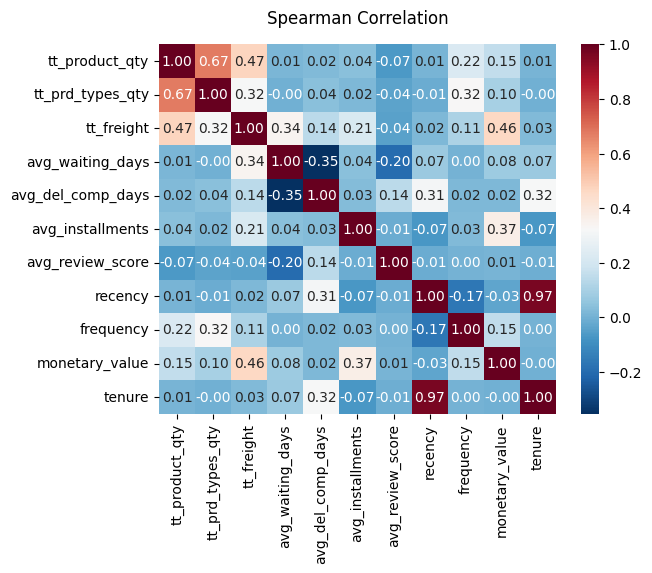

In [44]:
# Select float and int types
predict_next_order_del_rfm_num = predict_next_order_del_rfm.drop(
     "retention", axis = 1).select_dtypes("number")

sns.heatmap(
    data = predict_next_order_del_rfm_num.corr(method = "spearman"),
    annot = True,
    fmt = ".2f",
    cmap='RdBu_r')
plt.title("Spearman Correlation", pad = 15)
plt.show()

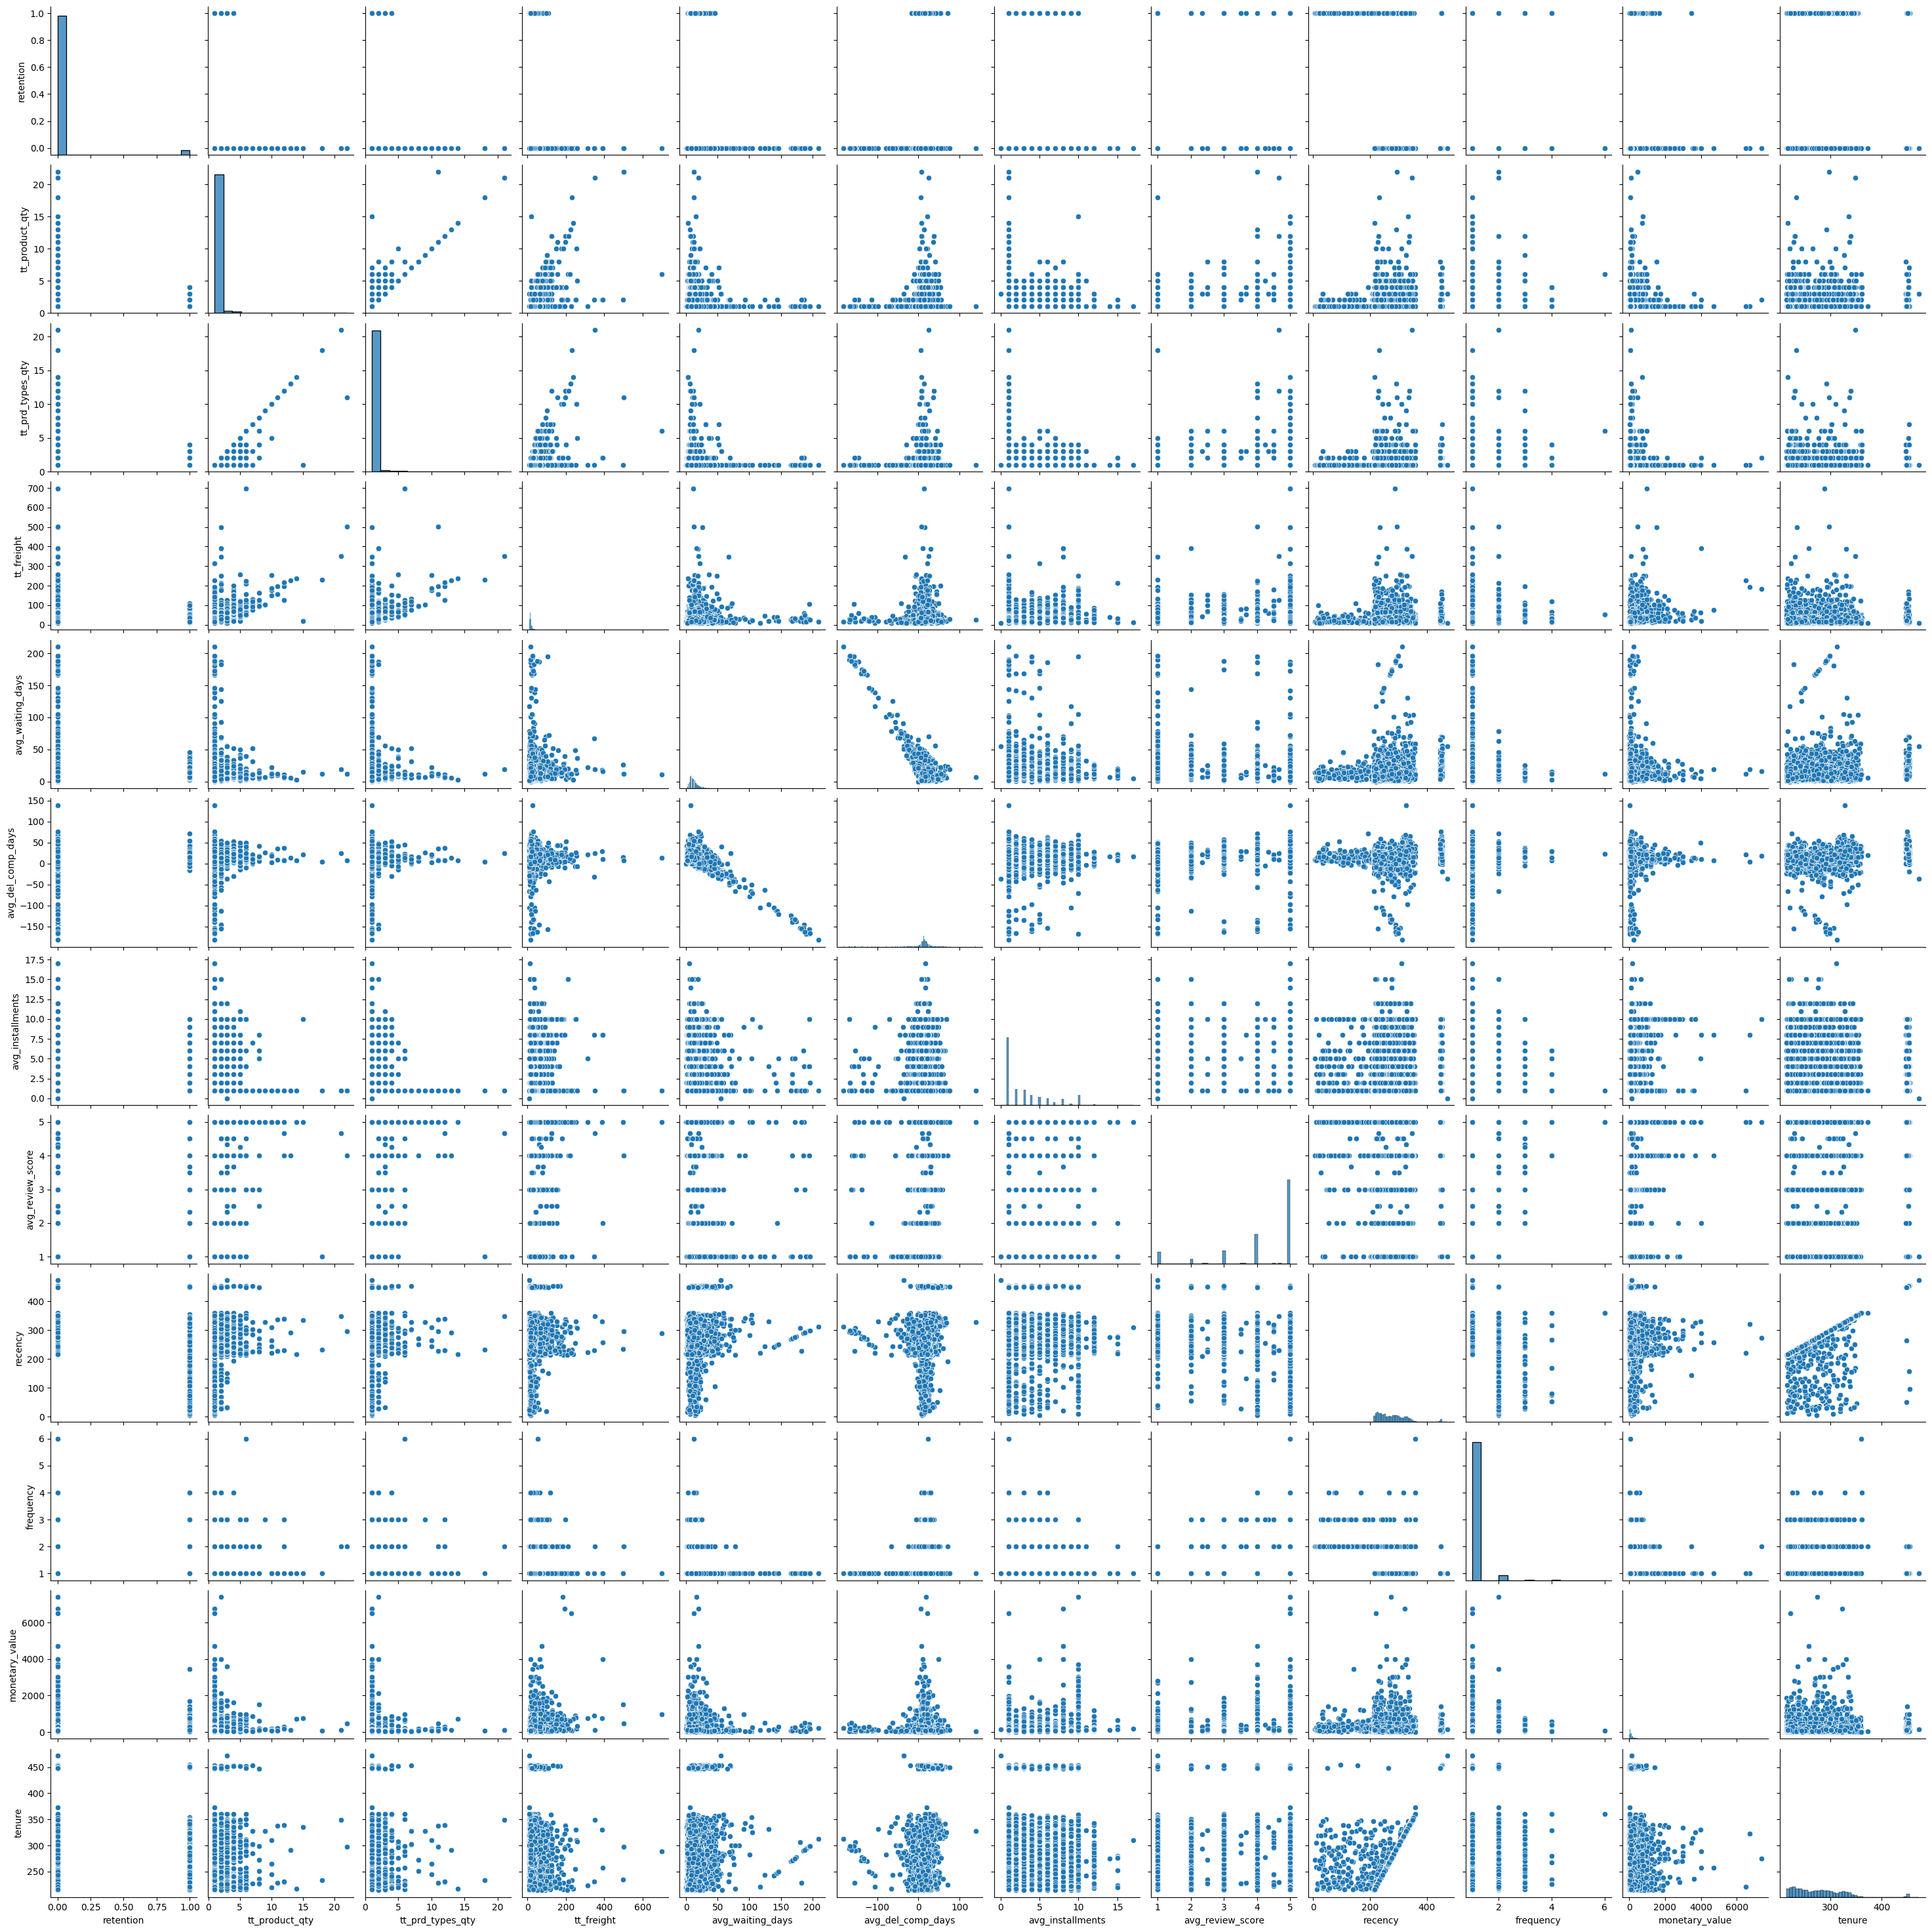

In [45]:
# Pairplot

sns.pairplot(predict_next_order_del_rfm)
plt.show()

## Relevant Features for Customer Segmentation (K-Means)



To gain actionable insights for retention prediction, we will perform an analysis of customer segmentation through customer demographics, behavior, and preferences.


In [46]:
# Rename columns
predict_next_order_del_rfm = predict_next_order_del_rfm.rename({
    "pref_purch_d_n": "purch_d_n",
    "pref_purch_wd": "purch_wd",
    "pref_pay_type": "pay_type",
    "sp_rj_mg_or_other_state": "sp_rj_mg_or_other"
}, axis = 1)

predict_next_order_del_rfm.columns

# Relevant Features
feat_cust_seg_kmeans_df = predict_next_order_del_rfm[["customer_unique_id",
                                                     "tt_product_qty",
                                                      "avg_installments",
                                                     "purch_d_n",
                                                     "purch_wd",
                                                     "pay_type",
                                                     "sp_rj_mg_or_other",
                                                     "recency",
                                                     "frequency",
                                                     "monetary_value"]]

Check Distributions

       tt_product_qty  avg_installments       recency     frequency  \
count    10819.000000      10819.000000  10819.000000  10819.000000   
mean         1.200850          3.117941    273.364540      1.042610   
std          0.773866          2.849032     52.065239      0.229816   
min          1.000000          0.000000      6.128785      1.000000   
25%          1.000000          1.000000    236.359375      1.000000   
50%          1.000000          2.000000    269.419398      1.000000   
75%          1.000000          4.000000    304.076574      1.000000   
max         22.000000         17.000000    472.488437      6.000000   

       monetary_value  
count    10819.000000  
mean       148.320936  
std        255.913957  
min          3.900000  
25%         44.990000  
50%         89.900000  
75%        159.980000  
max       7388.000000  


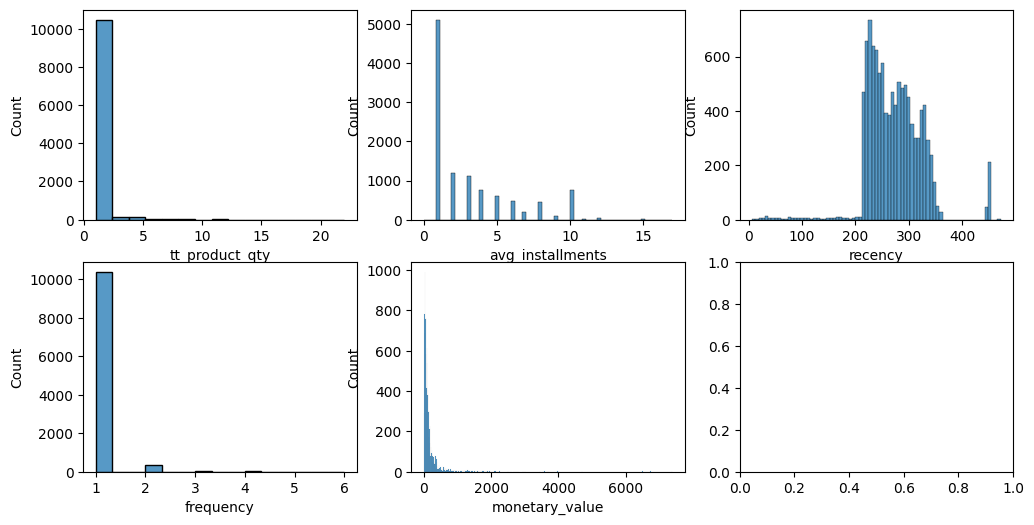

In [47]:
# Select numerical features
feat_cust_seg_kmeans_df_num = pd.concat([
    feat_cust_seg_kmeans_df["customer_unique_id"],
    feat_cust_seg_kmeans_df.select_dtypes("number")],
    axis = 1)

# Inspect
print(feat_cust_seg_kmeans_df_num.describe())

# Histogram
fig, ax = plt.subplots(2,3, figsize = (12,6))
ax = ax.flatten() # Flatten the axes array for easier iteration
for i, col in enumerate(feat_cust_seg_kmeans_df_num.iloc[:,1:]):
  sns.histplot(
      data = predict_next_order_del_rfm_num,
      x = col,
      ax = ax[i]
)
plt.show()

Notes:
*   The distributions are not normal (kurtosis and/ or skewness). We will try Logarithmic and Box-Cox transformations.


Logarithmic Transformation

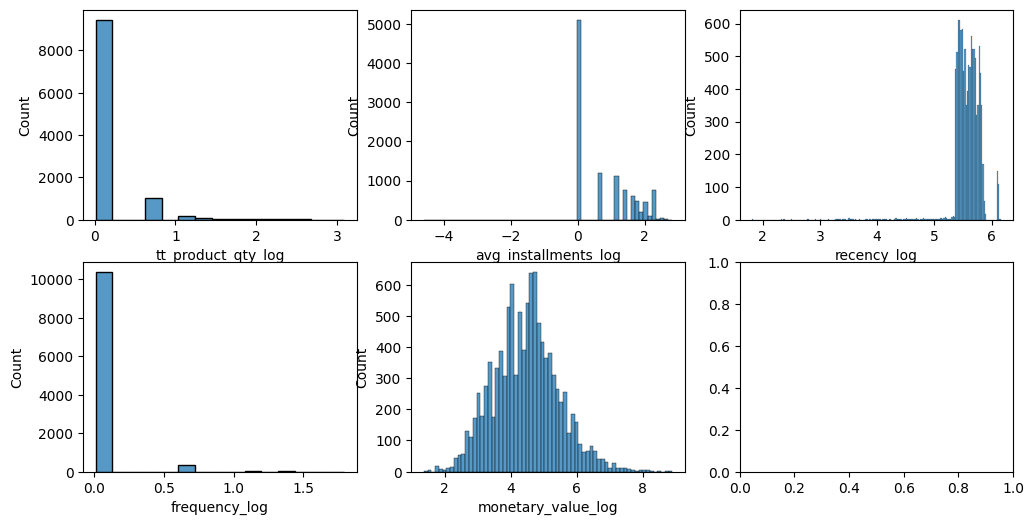

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10819 entries, 0 to 10818
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_unique_id    10819 non-null  object 
 1   tt_product_qty        10819 non-null  int64  
 2   avg_installments      10819 non-null  float64
 3   recency               10819 non-null  float64
 4   frequency             10819 non-null  int64  
 5   monetary_value        10819 non-null  float64
 6   tt_product_qty_log    10819 non-null  float64
 7   avg_installments_log  10819 non-null  float64
 8   recency_log           10819 non-null  float64
 9   frequency_log         10819 non-null  float64
 10  monetary_value_log    10819 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 929.9+ KB
None


In [48]:
# Log
# + 0.01 due to zeros on installments
for col in feat_cust_seg_kmeans_df_num.iloc[:,1:]:
  feat_cust_seg_kmeans_df_num[f"{col}_log"] = np.log(feat_cust_seg_kmeans_df_num[col] + 0.01)

# Histogram
fig, ax = plt.subplots(2,3, figsize = (12,6))
ax = ax.flatten() # Flatten the axes array for easier iteration
for i, col in enumerate(feat_cust_seg_kmeans_df_num.iloc[:,6:]):
  sns.histplot(
      data = feat_cust_seg_kmeans_df_num,
      x = col,
      ax = ax[i]
)
plt.show()

print(feat_cust_seg_kmeans_df_num.info())

Box-Cox Transformation

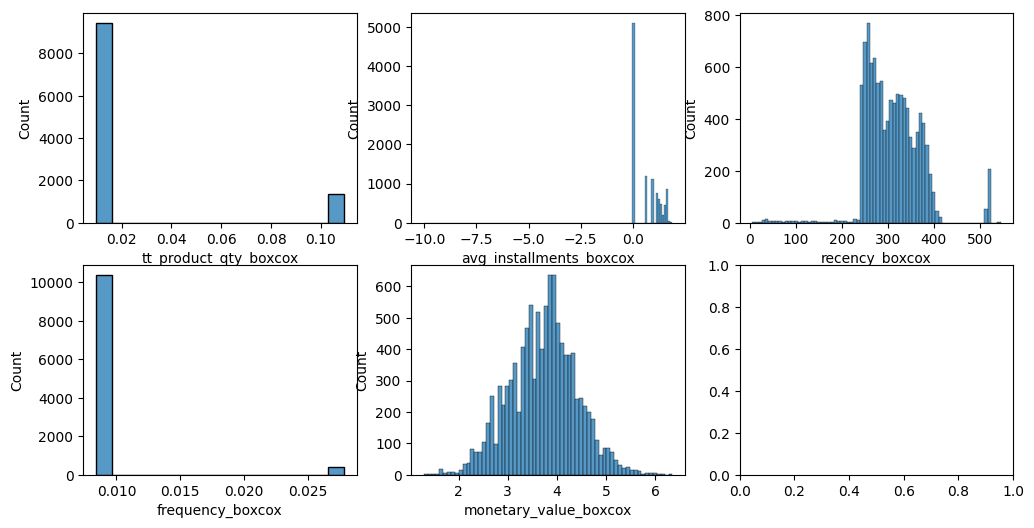

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10819 entries, 0 to 10818
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_unique_id       10819 non-null  object 
 1   tt_product_qty           10819 non-null  int64  
 2   avg_installments         10819 non-null  float64
 3   recency                  10819 non-null  float64
 4   frequency                10819 non-null  int64  
 5   monetary_value           10819 non-null  float64
 6   tt_product_qty_log       10819 non-null  float64
 7   avg_installments_log     10819 non-null  float64
 8   recency_log              10819 non-null  float64
 9   frequency_log            10819 non-null  float64
 10  monetary_value_log       10819 non-null  float64
 11  tt_product_qty_boxcox    10819 non-null  float64
 12  avg_installments_boxcox  10819 non-null  float64
 13  recency_boxcox           10819 non-null  float64
 14  frequency_boxcox      

In [49]:
# Box-Cox
for col in feat_cust_seg_kmeans_df_num.iloc[:,1:6]:
  feat_cust_seg_kmeans_df_num[f"{col}_boxcox"], _ = boxcox(feat_cust_seg_kmeans_df_num[col] + 0.01)

# Histogram
fig, ax = plt.subplots(2,3, figsize = (12,6))
ax = ax.flatten() # Flatten the axes array for easier iteration
for i, col in enumerate(feat_cust_seg_kmeans_df_num.iloc[:,11:]):
  sns.histplot(
      data = feat_cust_seg_kmeans_df_num,
      x = col,
      ax = ax[i]
)
plt.show()

# Inspect
print(feat_cust_seg_kmeans_df_num.info())
print(feat_cust_seg_kmeans_df_num.isna().sum())

Conclusions:
*   It looks like the Box-Cox transformation worked better than Log transformation.
*   Therefore, we will remove the log transformation.
*   Still, the Box-Cox transformation did not work either for Frequency.

Create CSV files to be used on K-Means (Customer Segmentation)

In [50]:
# File without transformation
feat_cust_seg_kmeans_df.to_csv("cust_seg_kmeans_df.csv", index = False) # Don't use this csv file. Use the csv file from the drive.


# File with Box-Cox transformation
cust_seg_kmeans_boxcox_df = feat_cust_seg_kmeans_df[["customer_unique_id",
                                                     "purch_d_n",
                                                     "purch_wd",
                                                     "pay_type",
                                                     "sp_rj_mg_or_other"]].merge(
                                                         feat_cust_seg_kmeans_df_num[[
                                                             "customer_unique_id",
                                                             "tt_product_qty_boxcox",
                                                             "avg_installments_boxcox",
                                                             "recency_boxcox",
                                                             "frequency_boxcox",
                                                             "monetary_value_boxcox"]],
                                                         how = "left",
                                                         on = "customer_unique_id")

# Inspect
cust_seg_kmeans_boxcox_df.info()

# Export to csv
cust_seg_kmeans_boxcox_df.to_csv("cust_seg_kmeans_boxcox_df.csv", index = False) # Don't use this csv file. Use the csv file from the drive.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10819 entries, 0 to 10818
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_unique_id       10819 non-null  object 
 1   purch_d_n                10819 non-null  object 
 2   purch_wd                 10819 non-null  object 
 3   pay_type                 10819 non-null  object 
 4   sp_rj_mg_or_other        10819 non-null  object 
 5   tt_product_qty_boxcox    10819 non-null  float64
 6   avg_installments_boxcox  10819 non-null  float64
 7   recency_boxcox           10819 non-null  float64
 8   frequency_boxcox         10819 non-null  float64
 9   monetary_value_boxcox    10819 non-null  float64
dtypes: float64(5), object(5)
memory usage: 845.4+ KB


## Final Features with Clusters for Order Prediction (Classification Models)

Create the CSV file with the clusters as output of K-Means to be used on Classification Models (Random Forest and Logistic Regression)

In [52]:
# Clusters Labels from K-Means
# Substitute the file path below with your own file path from 'FINAL-GRUPOIII' folder.
# The file name is "clusters.csv".
clusters = pd.read_csv("/content/drive/MyDrive/Projeto1/Samba_Lovers/Project_I/APRESENTAÇÃO/FINAL-GRUPOIII/clusters.csv")
clusters.info()

# Relevant features
pred_next_order_del = predict_next_order_del_rfm[["customer_unique_id",
                                                  "retention",
                                                  "tt_product_qty",
                                                  "tt_freight",
                                                  "avg_waiting_days",
                                                  "avg_del_comp_days",
                                                  "avg_review_score",
                                                  "purch_d_n",
                                                  "purch_wd",
                                                  "pay_type",
                                                  "sp_rj_mg_or_other"]]

# Join
features_table = pred_next_order_del.merge(clusters[["customer_unique_id", "cluster"]],
                                                            how = "left",
                                                            on = "customer_unique_id")

# Inspect
features_table.info()
features_table.isna().sum()

# Export to csv
features_table.to_csv("features_table.csv", index = False) # Don't use this csv file. Use the csv file from the drive.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10819 entries, 0 to 10818
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  10819 non-null  object 
 1   tt_product_qty      10819 non-null  int64  
 2   avg_installments    10819 non-null  float64
 3   purch_d_n           10819 non-null  object 
 4   purch_wd            10819 non-null  object 
 5   pay_type            10819 non-null  object 
 6   sp_rj_mg_or_other   10819 non-null  object 
 7   recency             10819 non-null  float64
 8   frequency           10819 non-null  int64  
 9   monetary_value      10819 non-null  float64
 10  cluster             10819 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 929.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10819 entries, 0 to 10818
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              -------